# PyMC的介绍概述
注:本文部分基于John Salvatier、Thomas V. Wiecki和Christopher Fonnesbeck的[PeerJ CS关于PyMC的出版物](https://peerj.com/articles/cs-55/)。
>Note: This text is partly based on the [PeerJ CS publication on PyMC](https://peerj.com/articles/cs-55/) by John Salvatier, Thomas V. Wiecki, and Christopher Fonnesbeck.


## 摘要

概率编程允许对用户定义的概率模型进行自动贝叶斯推理。基于梯度的马尔可夫链蒙特卡罗(MCMC)采样算法，被称为哈密顿蒙特卡罗(HMC)，允许对日益复杂的模型进行推断，但需要梯度信息，这通常不是微不足道的计算。PyMC是一个用Python编写的开源概率编程框架，它使用PyTensor通过自动微分来计算梯度，以及动态地将概率程序编译到一套计算后端之一以提高速度。PyMC允许在Python代码中进行模型规范，而不是在特定于领域的语言中，这使得它易于学习、定制和调试。对于那些已经有点熟悉贝叶斯统计的人来说，本文是对这个软件包的教程式介绍。
>Probabilistic Programming allows for automatic Bayesian inference on user-defined probabilistic models. Gradient-based algorithms for Markov chain Monte Carlo (MCMC) sampling, known as Hamiltonian Monte Carlo (HMC), allow inference on increasingly complex models but requires gradient information that is often not trivial to calculate. PyMC is an open source probabilistic programming framework written in Python that uses PyTensor to compute gradients via automatic differentiation, as well as compiling probabilistic programs on-the-fly to one of a suite of computational backends for increased speed. PyMC allows for model specification in Python code, rather than in a domain-specific language, making it easy to learn, customize, and debug. This paper is a tutorial-style introduction to this software package for those already somewhat familiar with Bayesian statistics.




## 简介
概率编程(PP)允许在代码中灵活地指定贝叶斯统计模型。PyMC是一个PP框架，其语法直观易读，功能强大，接近统计学家用来描述模型的自然语法。它具有下一代马尔可夫链蒙特卡罗(MCMC)采样算法，如No-U-Turn采样器(NUTS;Hoffman, 2014)，哈密顿蒙特卡洛(HMC;杜安,1987)。这类采样器在高维和复杂的后验分布上工作得很好，并且允许许多复杂的模型在没有关于拟合算法的专门知识的情况下被拟合。HMC和NUTS利用来自可能性的梯度信息来实现比传统抽样方法更快的收敛，特别是对于较大的模型。NUTS还有一些自调整策略，用于自适应地设置哈密顿蒙特卡洛的可调参数，这意味着您通常不需要了解算法如何工作的专业知识。
>Probabilistic programming (PP) allows flexible specification of Bayesian statistical models in code. PyMC is a PP framework with an intuitive and readable, yet powerful, syntax that is close to the natural syntax statisticians use to describe models. It features next-generation Markov chain Monte Carlo (MCMC) sampling algorithms such as the No-U-Turn Sampler (NUTS; Hoffman, 2014), a self-tuning variant of Hamiltonian Monte Carlo (HMC; Duane, 1987). This class of samplers works well on high-dimensional and complex posterior distributions and allows many complex models to be fit without specialized knowledge about fitting algorithms. HMC and NUTS take advantage of gradient information from the likelihood to achieve much faster convergence than traditional sampling methods, especially for larger models. NUTS also has several self-tuning strategies for adaptively setting the tunable parameters of Hamiltonian Monte Carlo, which means you usually don't need to have specialized knowledge about how the algorithms work. 

Python中的概率编程具有许多优势，包括多平台兼容性、表达清晰且可读的语法、易于与其他科学库集成以及通过C、c++、Fortran或Cython进行扩展。这些特性使得编写和使用自定义统计分布、采样器和转换函数相对简单，这是贝叶斯分析所需要的。
> Probabilistic programming in Python confers a number of advantages including multi-platform compatibility, an expressive yet clean and readable syntax, easy integration with other scientific libraries, and extensibility via C, C++, Fortran or Cython. These features make it relatively straightforward to write and use custom statistical distributions, samplers and transformation functions, as required by Bayesian analysis.

虽然PyMC面向用户的大多数特性都是用纯Python编写的，但它利用PyTensor (Theano项目的一个分支)透明地将模型转换为C并将其编译为机器代码，从而提高了性能。PyTensor是一个库，允许使用称为*张量*的广义向量数据结构定义表达式，它与流行的NumPy `~numpy.ndarray`紧密集成。ndarray的数据结构，并且类似地允许广播和高级索引，就像NumPy数组一样。PyTensor还自动优化可能性的计算图以提高速度，并允许编译到一套计算后端，包括Jax和Numba。


>While most of PyMC's user-facing features are written in pure Python, it leverages PyTensor (a fork of the Theano project) to transparently transcode models to C and compile them to machine code, thereby boosting performance. PyTensor is a library that allows expressions to be defined using generalized vector data structures called *tensors*, which are tightly integrated with the popular NumPy `~numpy.ndarray` data structure, and similarly allow for broadcasting and advanced indexing, just as NumPy arrays do. PyTensor also automatically optimizes the likelihood's computational graph for speed and allows for compilation to a suite of computational backends, including Jax and Numba.

在这里，我们介绍了使用PyMC来解决一般贝叶斯统计推断和预测问题的入门。我们将首先通过一个简单的示例了解如何使用PyMC的基础知识:安装、数据创建、模型定义、模型拟合和后验分析。然后，我们将介绍两个案例研究，并使用它们来展示如何定义和拟合更复杂的模型。最后，我们将讨论一些其他有用的特性:自定义分布和任意确定性节点。
>Here, we present a primer on the use of PyMC for solving general Bayesian statistical inference and prediction problems. We will first see the basics of how to use PyMC, motivated by a simple example: installation, data creation, model definition, model fitting and posterior analysis. Then we will cover two case studies and use them to show how to define and fit more sophisticated models. Finally we will discuss a couple of other useful features: custom distributions and arbitrary deterministic nodes.




## 安装

运行PyMC需要一个相对较新的Python解释器，最好是3.8或更高版本。通过ContinuumIO下载并安装免费的[' Anaconda Python发行版'](https://store.continuum.io/cshop/anaconda/)或开源的[Miniforge](https://github.com/conda-forge/miniforge)，可以轻松获得适用于macOS、Linux和Windows的完整Python安装。
安装Python之后，请遵循PyMC文档站点上的{ref} '安装指南<installation> '。
    
PyMC在自由的[Apache许可证2.0](https://github.com/pymc-devs/pymc/blob/master/LICENSE)下发布。在GitHub网站上，用户还可以报告错误和其他问题，以及为项目贡献文档或代码，这是我们积极鼓励的。

>Running PyMC requires a relatively recent Python interpreter, preferrably version 3.8 or greater. A complete Python installation for macOS, Linux and Windows can most easily be obtained by downloading and installing the free [`Anaconda Python Distribution`](https://store.continuum.io/cshop/anaconda/) by ContinuumIO or the open source [Miniforge](https://github.com/conda-forge/miniforge).
>
>Once Python is installed, follow the {ref}`installation guide <installation>` on the PyMC documentation site.
>
>PyMC is distributed under the liberal [Apache License 2.0](https://github.com/pymc-devs/pymc/blob/master/LICENSE). On the GitHub site, users may also report bugs and other issues, as well as contribute documentation or code to the project, which we actively encourage.

## 一个激励人心的例子：线性回归 A Motivating Example: Linear Regression
为了介绍模型定义、拟合和后验分析，我们首先考虑一个参数具有正态分布先验的简单贝叶斯线性回归模型。我们感兴趣的是预测结果$Y$作为正态分布观测值，其期望值$\mu$是两个预测变量$X_1$和$X_2$的线性函数:
>To introduce model definition, fitting, and posterior analysis, we first consider a simple Bayesian linear regression model with normally-distributed priors for the parameters. We are interested in predicting outcomes $Y$ as normally-distributed observations with an expected value $\mu$ that is a linear function of two predictor variables, $X_1$ and $X_2$:

$$\begin{aligned} 
Y  &\sim \mathcal{N}(\mu, \sigma^2) \\
\mu &= \alpha + \beta_1 X_1 + \beta_2 X_2
\end{aligned}$$
其中$\alpha$是截距，$\beta_i$是协变量$X_i$的系数，$\sigma$表示观测误差。由于我们正在构建一个贝叶斯模型，我们必须为模型中的未知变量分配一个先验分布。我们为两个回归系数选择方差为100的零均值正态先验，这对应于关于真实参数值的*弱*信息。我们选择半正态分布(有界于零的正态分布)作为$\sigma$的先验。
>where $\alpha$ is the intercept, and $\beta_i$ is the coefficient for covariate $X_i$, while $\sigma$ represents the observation error. Since we are constructing a Bayesian model, we must assign a prior distribution to the unknown variables in the model. We choose zero-mean normal priors with variance of 100 for both regression coefficients, which corresponds to *weak* information regarding the true parameter values. We choose a half-normal distribution (normal distribution bounded at zero) as the prior for $\sigma$.




$$\begin{aligned} 
\alpha &\sim \mathcal{N}(0, 100) \\
\beta_i &\sim \mathcal{N}(0, 100) \\
\sigma &\sim \lvert\mathcal{N}(0, 1){\rvert}
\end{aligned}$$

### 生成数据 Generating data

我们可以仅使用NumPy的{mod}`~numpy.random`从这个模型中模拟一些人工数据。模块，然后使用PyMC尝试恢复相应的参数。我们有意生成与PyMC模型结构紧密对应的数据。
>We can simulate some artificial data from this model using only NumPy's {mod}`~numpy.random` module, and then use PyMC to try to recover the corresponding parameters. We are intentionally generating the data to closely correspond the PyMC model structure.


In [2]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [4]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma


下面是模拟数据的样子。我们使用来自绘图库matplotlib的`pylab`模块。
>Here is what the simulated data look like. We use the `pylab` module from the plotting library matplotlib. 

Text(0.5, 0, 'Y hist')

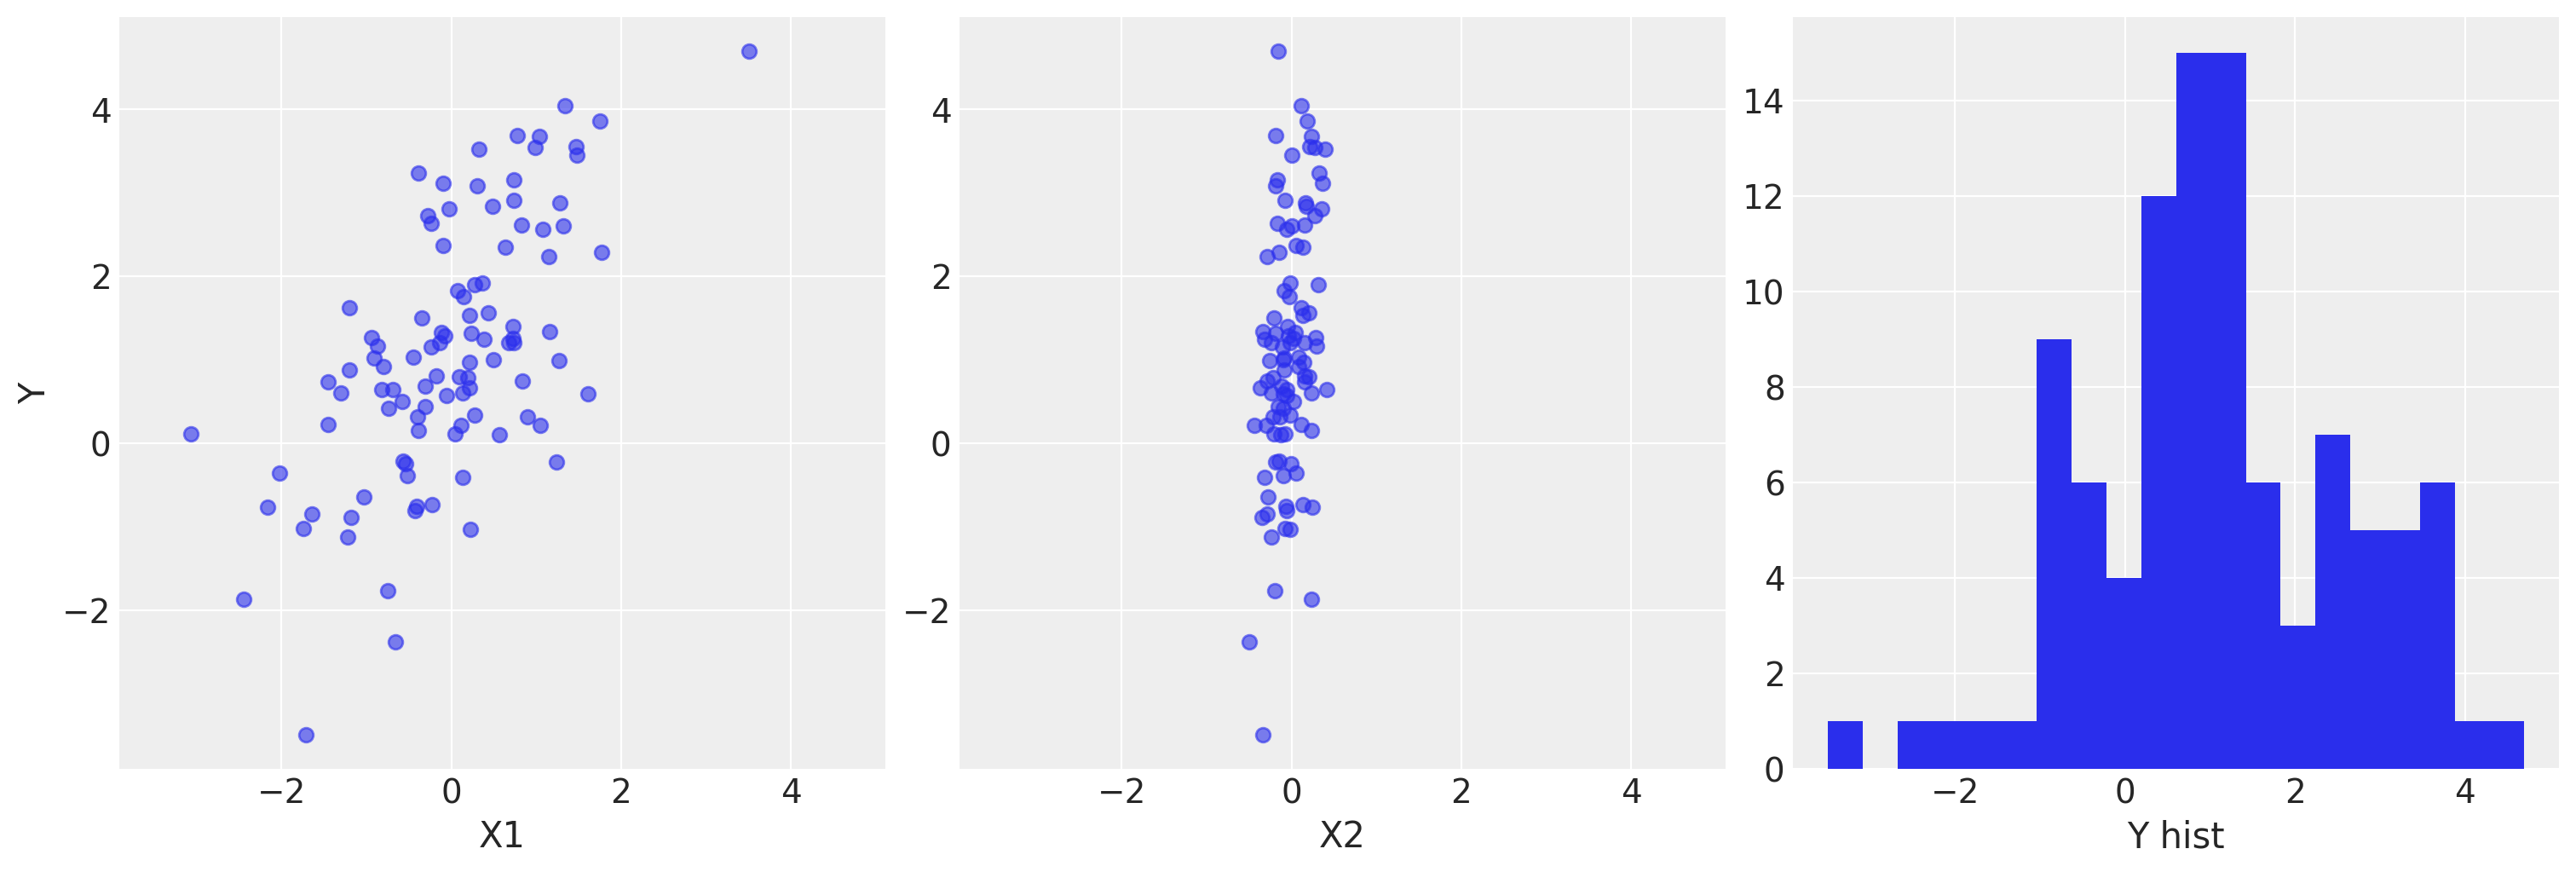

In [5]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 5))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[2].hist(Y,bins=20)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")
axes[2].set_xlabel("Y hist")

### 模型设定 Model Specification

在PyMC中指定这个模型很简单，因为语法类似于统计符号。在大多数情况下，Python代码的每一行都对应上面模型符号中的一行。
首先，导入PyMC。我们使用将其导入为`pm`的约定。
>Specifying this model in PyMC is straightforward because the syntax is similar to the statistical notation. For the most part, each line of Python code corresponds to a line in the model notation above. 
>
>First, we import PyMC. We use the convention of importing it as `pm`.




In [6]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.4.0


现在我们构建我们的模型，我们将首先完整地展示它，然后逐行解释每个部分。
>Now we build our model, which we will present in full first, then explain each part line-by-line.

In [7]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    # 未知的模型参数的先验
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    # 期望输出的值 mu
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    # 观察结果的似然(抽样分布)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

第一行

```python
basic_model = pm.Model()
```

创建了一个模型对象`~pymc.Model`，它是一个模型的随机变量的容器, 在模型实例化之后，模型组件的后续规范在' with '语句中执行:

```
with basic_model:
```
>creates a new `~pymc.Model` object which is a container for the model random variables.
>Following instantiation of the model, the subsequent specification of the model components is performed inside a  `with` statement:

这将创建一个以' basic_model '为上下文的*上下文管理器*，其中包括缩进块结束之前的所有语句。这意味着在' with '语句下面的缩进代码块中引入的所有PyMC对象都在幕后添加到模型中。如果没有这个上下文管理器习语，我们将被迫在创建每个变量后立即手动将它们与“basic_model”关联起来。如果你试图创建一个没有' with model: '语句的新随机变量，它会引发一个错误，因为没有明显的模型可以添加到变量中。
>This creates a *context manager*, with our `basic_model` as the context, that includes all statements until the indented block ends. This means all PyMC objects introduced in the indented code block below the `with` statement are added to the model behind the scenes. Absent this context manager idiom, we would be forced to manually associate each of the variables with `basic_model` right after we create them. If you try to create a new random variable without a `with model:` statement, it will raise an error since there is no obvious model for the variable to be added to.

上下文管理器中的前三条语句:
>The first three statements in the context manager:

```python
alpha = pm.Normal('alpha', mu=0, sigma=10)
beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
sigma = pm.HalfNormal('sigma', sigma=1)
```
$$\begin{aligned} 
\alpha &\sim \mathcal{N}(0, 100) \\
\beta_i &\sim \mathcal{N}(0, 100) \\
\sigma &\sim \lvert\mathcal{N}(0, 1){\rvert}
\end{aligned}$$

创建**随机**随机变量，回归系数的正态分布先验分布均值为0，标准差为10，观测值的标准差为半正态分布$\sigma$。它们是随机的，因为它们的值部分是由随机变量依赖图中的父变量决定的，对于先验来说是简单常数，部分是随机的(或随机的)。
>create **stochastic** random variables with normally-distributed prior distributions for the regression coefficients with a mean of 0 and standard deviation of 10, and a half-normal distribution for the standard deviation of the observations, $\sigma$. These are stochastic because their values are partly determined by their parents in the dependency graph of random variables, which for priors are simple constants, and partly random (or stochastic). 

我们调用“pm.Normal”构造函数来创建一个随机变量作为正常先验。第一个参数始终是随机变量的*名称*，它几乎应该始终与被分配到的Python变量的名称匹配，因为它有时用于从模型中检索变量以总结输出。随机对象所需的其余参数是参数，在这种情况下是“mu”，即平均值和“sigma”，即标准偏差，我们为模型分配超参数值。一般来说，分布的参数是决定随机变量的位置、形状或比例的值，具体取决于分布的参数化。最常用的发行版，如“Beta”、“Exponential”、“Categorical”、“Gamma”、“Binomial”和许多其他发行版，都可以在PyMC中找到。
>We call the `pm.Normal` constructor to create a random variable to use as a normal prior. The first argument is always the *name* of the random variable, which should almost always match the name of the Python variable being assigned to, since it is sometimes used to retrieve the variable from the model for summarizing output. The remaining required arguments for a stochastic object are the parameters, in this case `mu`, the mean, and `sigma`, the standard deviation, which we assign hyperparameter values for the model. In general, a distribution's parameters are values that determine the location, shape or scale of the random variable, depending on the parameterization of the distribution. Most commonly-used distributions, such as `Beta`, `Exponential`, `Categorical`, `Gamma`, `Binomial` and many others, are available in PyMC.

' beta '变量有一个额外的' shape '参数，以表示它是一个大小为2的向量值参数。' shape '参数可用于所有分布，并指定随机变量的长度或形状，但对于标量变量是可选的，因为它默认值为1。它可以是一个整数来指定一个数组，也可以是一个元组来指定一个多维数组(*例如。* ' shape=(5,7) '生成一个5 × 7矩阵值的随机变量)。关于分布、采样方法和其他PyMC函数的详细说明可在{ref} ' API文档< API > '中找到。
>The `beta` variable has an additional `shape` argument to denote it as a vector-valued parameter of size 2. The `shape` argument is available for all distributions and specifies the length or shape of the random variable, but is optional for scalar variables, since it defaults to a value of one. It can be an integer to specify an array, or a tuple to specify a multidimensional array (*e.g.* `shape=(5,7)` makes a random variable that takes on 5 by 7 matrix values). 
>
>Detailed notes about distributions, sampling methods and other PyMC functions are available in the {ref}`API documentation <api>`.

定义先验后，下一个语句创建结果的期望值' mu '，指定线性关系:
>Having defined the priors, the next statement creates the expected value `mu` of the outcomes, specifying the linear relationship:

```python
mu = alpha + beta[0]*X1 + beta[1]*X2
```
$$\begin{aligned} 
mu &= \alpha + \beta_1 X_1 + \beta_2 X_2
\end{aligned}$$

这就产生了一个确定性的随机变量，这意味着它的值完全由父变量的值决定。也就是说，除了父母固有的价值观之外，没有其他不确定性。这里，“mu”只是截距“alpha”和“beta”中的系数和预测变量的两个乘积的和，无论它们的值是什么。
>This creates a **deterministic** random variable, which implies that its value is *completely* determined by its parents' values. That is, there is no uncertainty beyond that which is inherent in the parents' values. Here, `mu` is just the sum of the intercept `alpha` and the two products of the coefficients in `beta` and the predictor variables, whatever their values may be. 

PyMC随机变量和数据可以任意加、减、除、乘和索引，以创建新的随机变量。这使得模型具有很强的表达能力。还提供了许多常见的数学函数，如“sum”、“sin”、“exp”和线性代数函数，如“dot”(内积)和“inv”(逆)。
>PyMC random variables and data can be arbitrarily added, subtracted, divided, multiplied together and indexed-into to create new random variables. This allows for great model expressivity. Many common mathematical functions like `sum`, `sin`, `exp` and linear algebra functions like `dot` (for inner product) and `inv` (for inverse) are also provided. 

模型的最后一行定义了“Y_obs”，即数据集中结果的抽样分布。
>The final line of the model defines `Y_obs`, the sampling distribution of the outcomes in the dataset.

```python
Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
```
这是一个随机变量的特殊情况，我们称之为**观察到的随机**，并表示模型的数据可能性。它与标准随机相同，只是其将数据传递给变量的“观察”参数表明该变量的值已被观察到，不应被应用于模型的任何拟合算法更改。数据可以以`~numpy.ndarray`或`~pandas.DataFrame`对象的形式传递。
>This is a special case of a stochastic variable that we call an **observed stochastic**, and represents the data likelihood of the model. It is identical to a standard stochastic, except that its `observed` argument, which passes the data to the variable, indicates that the values for this variable were observed, and should not be changed by any fitting algorithm applied to the model. The data can be passed in the form of either a `~numpy.ndarray` or `~pandas.DataFrame` object.

请注意，与模型的先验不同，“Y_obs”的正态分布的参数不是固定值，而是确定性对象“mu”和随机对象“sigma”。这就在可能性和这两个变量之间建立了亲子关系。
>Notice that, unlike for the priors of the model, the parameters for the normal distribution of `Y_obs` are not fixed values, but rather are the deterministic object `mu` and the stochastic `sigma`. This creates parent-child relationships between the likelihood and these two variables.

In [10]:
# with basic_model:
#     # draw 1000 posterior samples
#     idata = pm.sample(draws=1000,tuns=1000,model=basic_model)

idata = pm.sample(draws=1000,tune=2000,model=basic_model)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 1 seconds.


The {mod}`~pymc.sample` function runs the step method(s) assigned (or passed) to it for the given number of iterations and returns an `~arviz.InferenceData` object containing the samples collected, along with other useful attributes like statistics of the sampling run and a copy of the observed data. Notice that `sample` generated a set of parallel chains, depending on how many compute cores are on your machine.

The various attributes of the `InferenceData` object can be queried in a similar way to a `dict` containing a map from variable names to `numpy.array`s. For example, we can retrieve the sampling trace from the `alpha` latent variable by using the variable name as an index to the `idata.posterior` attribute. The first dimension of the returned array is the chain index, the second dimension is the sampling index, while the later dimensions match the shape of the variable. We can see the first 5 values for the `alpha` variable in each chain as follows:

In [14]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.31459094, 1.17570521, 1.14817464, 1.09776038, 1.19978447],
       [1.1822703 , 1.15791701, 1.15734844, 1.12679826, 1.15190298],
       [1.25180315, 1.07583815, 1.31499363, 1.15103501, 1.15103501],
       [1.14005857, 1.34447667, 0.95473204, 1.27641743, 1.07109047]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

如果我们想使用切片采样算法来“sigma”而不是NUTS（自动分配），我们可以将其指定为“样本”的“步骤”参数。
>If we wanted to use the slice sampling algorithm to `sigma` instead of NUTS (which was assigned automatically), we could have specified this as the `step` argument for `sample`.

In [15]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 4 seconds.


### 后验分析 Posterior analysis

`PyMC`的绘图和诊断功能现在由一个名为`Arviz <arviz:index>`的专用平台无关软件包处理。可以使用`~arviz.plot_trace`创建简单的后方图。
>`PyMC`'s plotting and diagnostics functionalities are now taken care of by a dedicated, platform-agnostic package named `Arviz <arviz:index>`. A simple posterior plot can be created using {mod}`~arviz.plot_trace`.

array([[<AxesSubplot: title={'center': 'alpha'}>,
        <AxesSubplot: title={'center': 'alpha'}>],
       [<AxesSubplot: title={'center': 'beta'}>,
        <AxesSubplot: title={'center': 'beta'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

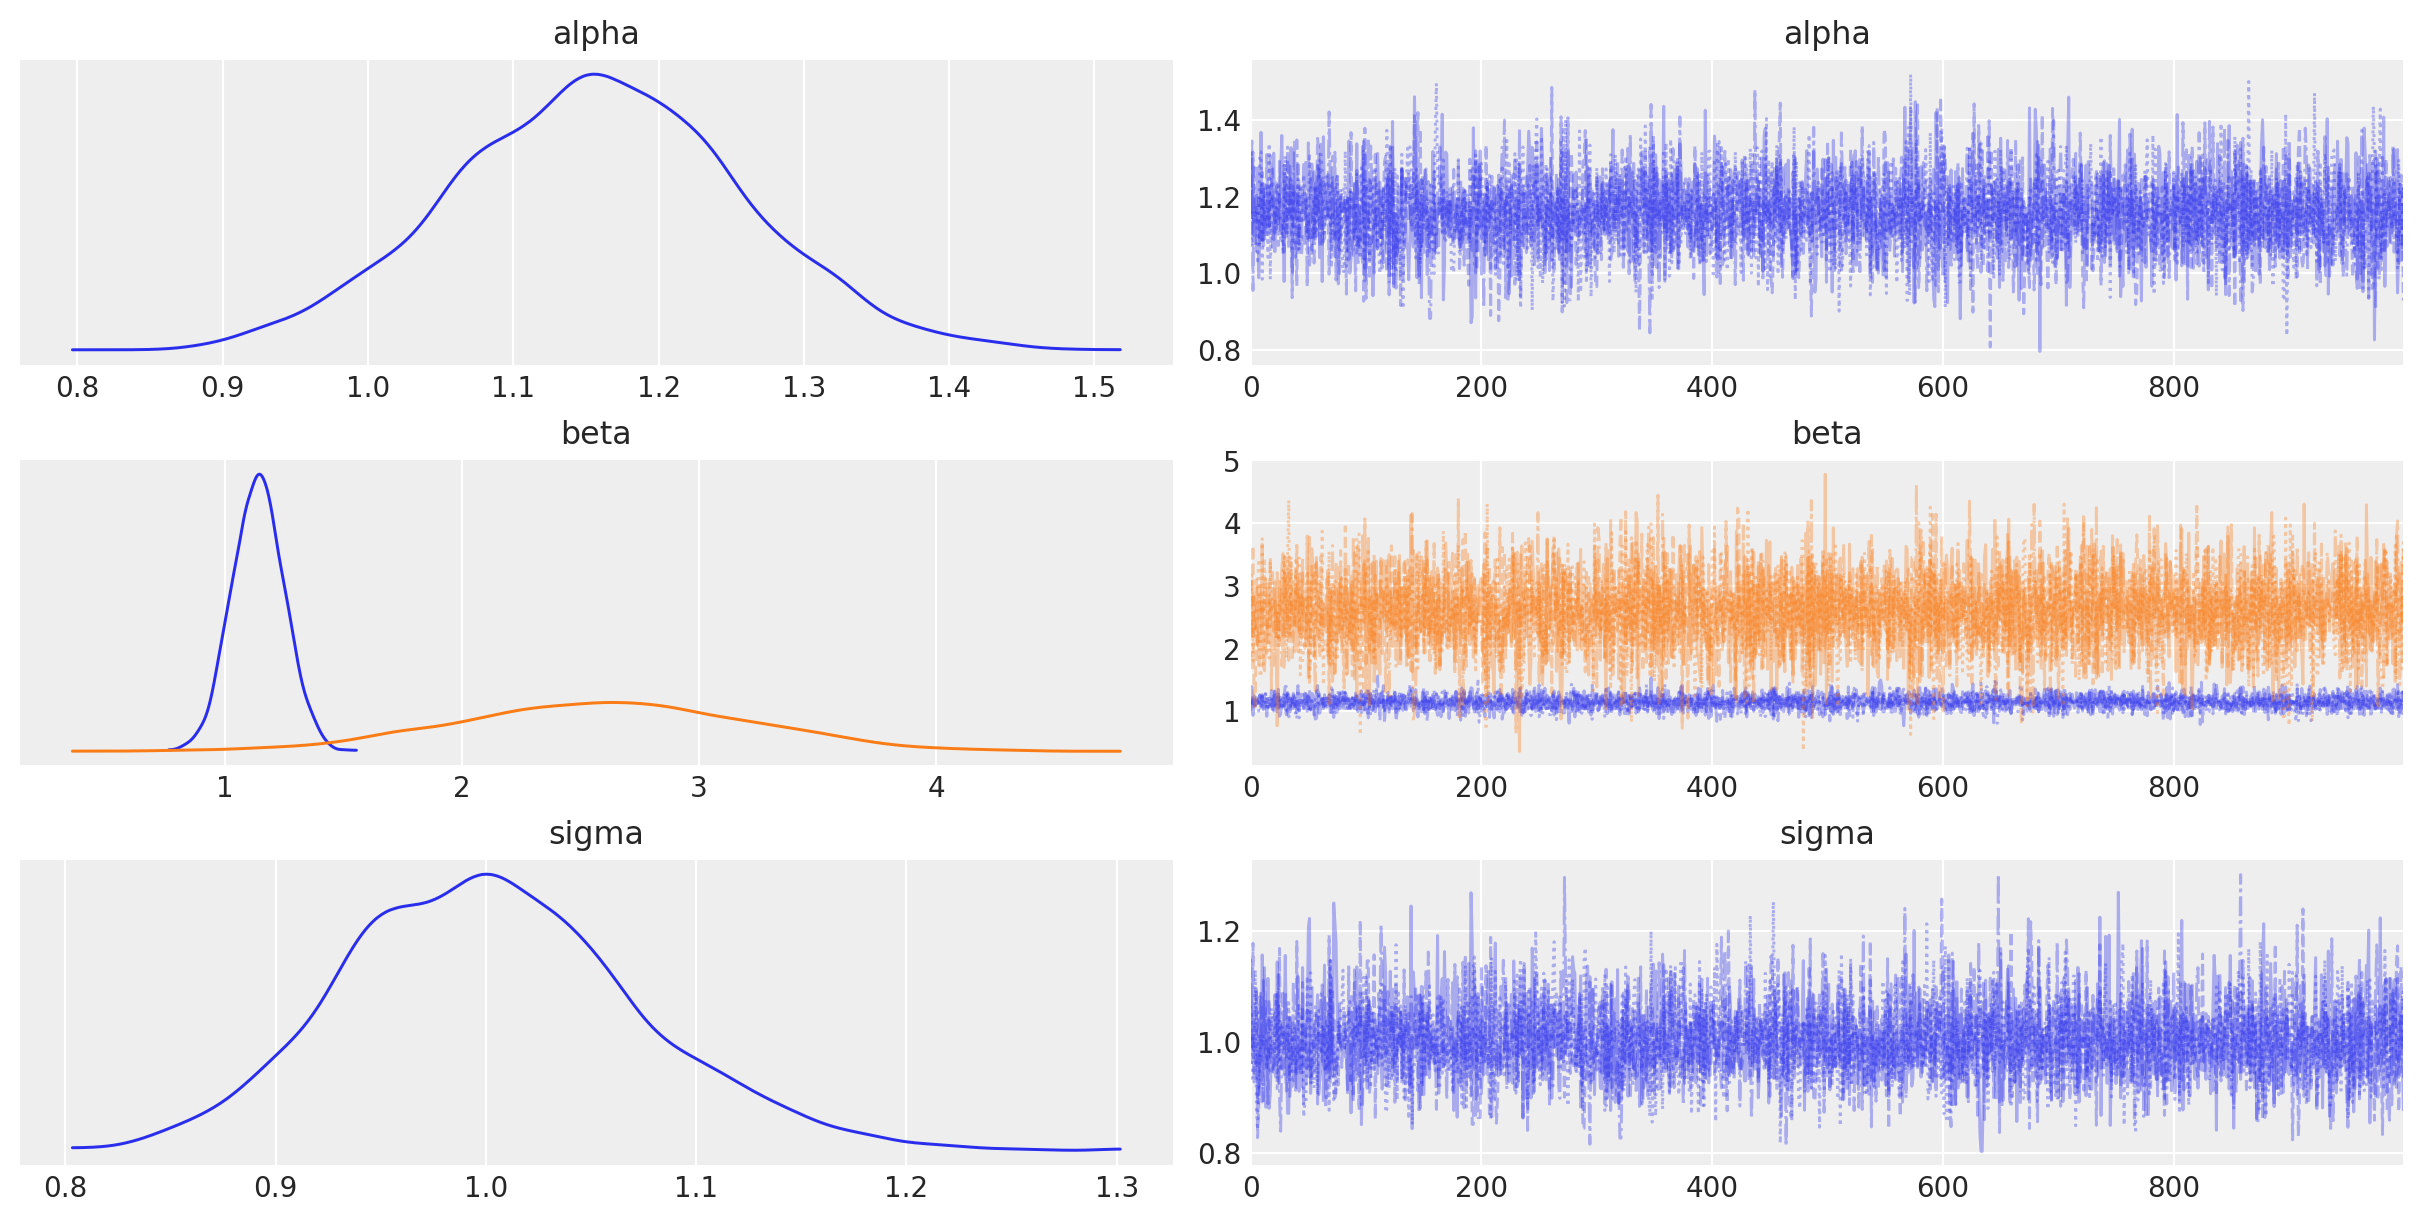

In [17]:
az.plot_trace(idata, combined=True)

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. The `beta` variable, being vector-valued, produces two density plots and two trace plots, corresponding to both predictor coefficients.

In addition, the {mod}`~arviz.summary` function provides a text-based output of common posterior statistics:

In [18]:
az.summary(idata, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    1.16  0.10    0.96     1.34       0.00     0.00   6113.00   3449.46   
beta[0]  1.14  0.11    0.94     1.35       0.00     0.00   6076.87   2996.59   
beta[1]  2.59  0.62    1.42     3.72       0.01     0.01   7516.13   3016.49   
sigma    1.00  0.07    0.88     1.14       0.00     0.00   5148.26   3106.85   

         r_hat  
alpha      1.0  
beta[0]    1.0  
beta[1]    1.0  
sigma      1.0

## 案例研究1：听力受损儿童的教育成果 Educational Outcomes for Hearing-impaired Children

作为一个激励人心的例子，我们将使用听力障碍儿童教育成果的数据集。在这里，我们有兴趣确定与更好或更差的学习成果相关的因素。
>As a motivating example, we will use a dataset of educational outcomes for children with hearing impairment. Here, we are interested in determining factors that are associated with better or poorer learning outcomes. 

### 数据
这个匿名数据集来自听力和口语数据存储库(LSL-DR)，这是一个国际数据存储库，跟踪听力损失儿童的人口统计数据和纵向结果，并参加了专注于支持听力和口语发展的项目。研究人员对在这些项目中发现与改善教育结果相关的因素很感兴趣。
>This anonymized dataset is taken from the Listening and Spoken Language Data Repository (LSL-DR), an international data repository that tracks the demographics and longitudinal outcomes for children who have hearing loss and are enrolled in programs focused on supporting listening and spoken language development. Researchers are interested in discovering factors related to improvements in educational outcomes within these programs.

有一套可用的预测器，包括：

* gender (`male`)
* number of siblings in the household (`siblings`)
* index of family involvement (`family_inv`)
* whether the primary household language is not English (`non_english`)
* presence of a previous disability (`prev_disab`)
* non-white race (`non_white`)
* age at the time of testing (in months, `age_test`)
* whether hearing loss is not severe (`non_severe_hl`)
* whether the subject's mother obtained a high school diploma or better (`mother_hs`)
* whether the hearing impairment was identified by 3 months of age (`early_ident`).

结果变量是几个学习领域之一的标准化考试分数。
>The outcome variable is a standardized test score in one of several learning domains.

In [23]:
test_scores = pd.read_csv(pm.get_data("test_scores.csv"), index_col=0)
test_scores.head()

score  male  siblings  family_inv  non_english  prev_disab  age_test  \
0     40     0       2.0         2.0        False         NaN        55   
1     31     1       0.0         NaN        False         0.0        53   
2     83     1       1.0         1.0         True         0.0        52   
3     75     0       3.0         NaN        False         0.0        55   
5     62     0       0.0         4.0        False         1.0        50   

   non_severe_hl  mother_hs  early_ident  non_white  
0            1.0        NaN        False      False  
1            0.0        0.0        False      False  
2            1.0        NaN        False       True  
3            0.0        1.0        False      False  
5            0.0        NaN        False      False

<AxesSubplot: >

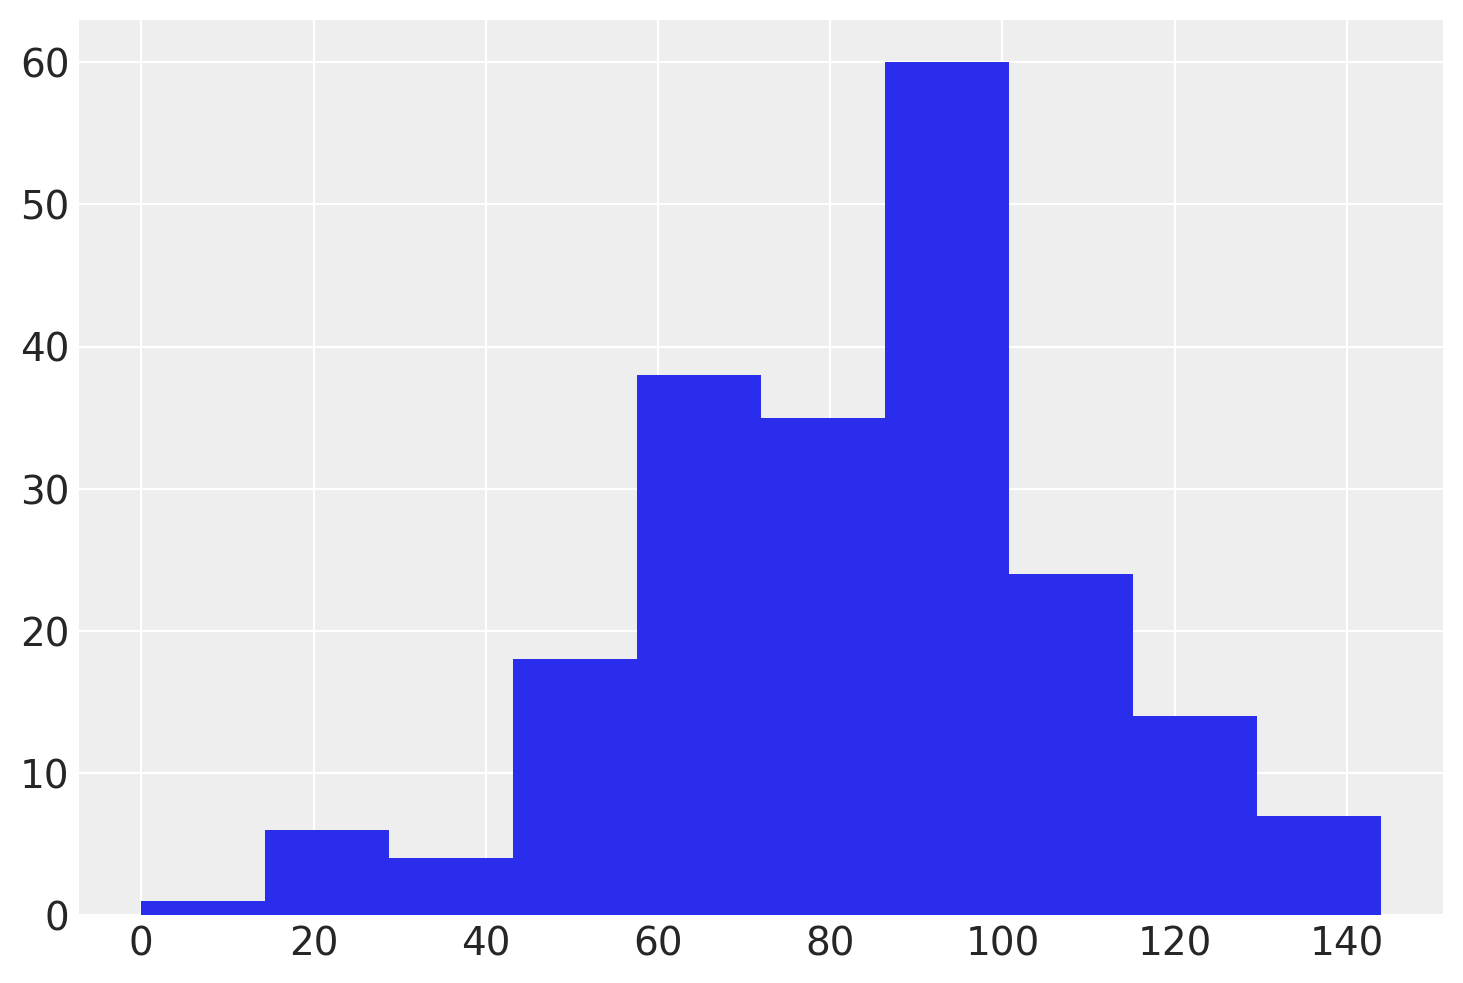

In [24]:
test_scores["score"].hist()

In [28]:
# Dropping missing values is a very bad idea in general, but we do so here for simplicity
X = test_scores.dropna().astype(float)
y = X.pop("score")

# Standardize the features
X -= X.mean()
X /= X.std()

N, D = X.shape

print(X.shape)

(101, 10)


### 模型

这是一个比第一个回归例子更现实的问题，因为我们现在处理的是一个多元回归模型。然而，虽然在LSL-DR数据集中有几个潜在的预测因子，但很难“先验地”确定哪些与构建有效的统计模型相关。有许多方法可以进行变量选择，但一种流行的自动化方法是“正则化”，即如果无效的协变量对预测结果没有贡献，则通过正则化(一种惩罚形式)将其缩小为零。

您可能已经从机器学习或经典统计应用程序中听说过正则化，其中像套索或岭回归这样的方法通过对回归参数的大小施加惩罚来将参数缩小到零。在贝叶斯上下文中，我们对回归系数应用适当的先验分布。一个这样的先验是*层次正则化马蹄形*，它使用两种正则化策略，一个全局参数和一组局部参数，每个系数一个。要做到这一点，关键是选择一个长尾分布作为收缩先验，它允许一些非零，同时使其余的趋于零。

>This is a more realistic problem than the first regression example, as we are now dealing with a **multivariate regression** model. However, while there are several potential predictors in the LSL-DR dataset, it is difficult *a priori* to determine which ones are relevant for constructing an effective statistical model. There are a number of approaches for conducting variable selection, but a popular automated method is *regularization*, whereby ineffective covariates are shrunk towards zero via regularization (a form of penalization) if they do not contribute to predicting outcomes. 
>
>You may have heard of regularization from machine learning or classical statistics applications, where methods like the lasso or ridge regression shrink parameters towards zero by applying a penalty to the size of the regression parameters. In a Bayesian context, we apply an appropriate prior distribution to the regression coefficients. One such prior is the *hierarchical regularized horseshoe*, which uses two regularization strategies, one global and a set of local local parameters, one for each coefficient. The key to making this work is by selecting a long-tailed distribution as the shrinkage priors, which allows some to be nonzero, while pushing the rest towards zero.

每个回归系数$\beta_i$的马蹄形先验如下所示：
>The horeshoe prior for each regression coefficient $\beta_i$ looks like this:

$$\beta_i \sim N\left(0, \tau^2 \cdot \tilde{\lambda}_i^2\right)$$

其中$\sigma$是错误标准偏差的先验，也将用于模型可能性。在这里，$\tau$是全局收缩参数，$\tilde{\lambda}_i$是局部收缩参数。让我们从全局开始：对于之前在$\tau$上，我们将使用Half-StudentT分布，这是一个合理的选择，因为它是heavy-tailed的。
>where $\sigma$ is the prior on the error standard deviation that will also be used for the model likelihood. Here, $\tau$ is the global shrinkage parameter and $\tilde{\lambda}_i$ is the local shrinkage parameter. Let's start global: for the prior on $\tau$ we will use a Half-StudentT distribution, which is a reasonable choice becuase it is heavy-tailed.

$$
\tau \sim \textrm{Half-StudentT}_{2} \left(\frac{D_0}{D - D_0} \cdot \frac{\sigma}{\sqrt{N}}\right).
$$
一个问题是，先验的参数化需要一个预先指定的值$D_0$，该值表示非零系数的真实数。幸运的是，只需要对这个值进行合理的猜测，它只需要在真实数字的数量级以内。让我们用一半的预测器作为我们的猜测：
>One catch is that the parameterization of the prior requires a pre-specified value $D_0$, which represents the true number of non-zero coefficients. Fortunately, a reasonable guess at this value is all that is required, and it need only be within an order of magnitude of the true number. Let's use half the number of predictors as our guess:

In [29]:
D0 = int(D / 2)

Meanwhile, the local shrinkage parameters are defined by the ratio:

$$\tilde{\lambda}_i^2 = \frac{c^2 \lambda_i^2}{c^2 + \tau^2 \lambda_i^2}.$$

To complete this specification, we need priors on $\lambda_i$ and $c$;  as with the global shrinkage, we use a long-tailed $\textrm{Half-StudentT}_5(1)$  on the $\lambda_i$. We need $c^2$ to be strictly positive, but not necessarily long-tailed, so an inverse gamma prior on $c^2$, $c^2 \sim \textrm{InverseGamma}(1, 1)$ fits the bill.

Finally, to allow the NUTS sampler to sample the $\beta_i$ more efficiently, we will re-parameterize it as follows:

$$
\begin{align*}
    z_i
        & \sim N(0, 1), \\
     \beta_i
         & = z_i \cdot \tau \cdot \tilde{\lambda_i}.
\end{align*}
$$

You will run into this reparameterization a lot in practice.


### Model Specification

Specifying the model in PyMC mirrors its statistical specification. This model employs a couple of new distributions: the `~pymc.HalfStudentT` distribution for the $\tau$ and $\lambda$ priors, and the `InverseGamma` distribution for the $c2$ variable.

In PyMC, variables with purely positive priors like `~pymc.InverseGamma` are transformed with a log transform. This makes sampling more robust. Behind the scenes, a variable in the unconstrained space (named `<variable-name>_log`) is added to the model for sampling. Variables with priors that constrain them on two sides, like `~pymc.Beta` or `~pymc.Uniform`, are also transformed to be unconstrained but with a log odds transform. 

We are also going to take advantage of named dimensions in PyMC and ArviZ by passing the input variable names into the model as coordinates called "predictors". This will allow us to pass this vector of names as a replacement for the `shape` integer argument in the vector-valued parameters. The model will then associate the appropriate name with each latent parameter that it is estimating. This is a little more work to set up, but will pay dividends later when we are working with our model output.

Let's encode this model in PyMC:

In [31]:
# import pytensor.tensor as at
from aesara import tensor as at

with pm.Model(coords={"predictors": X.columns.values}) as test_score_model:

    # Prior on error SD
    sigma = pm.HalfNormal("sigma", 25)

    # Global shrinkage prior
    tau = pm.HalfStudentT("tau", 2, D0 / (D - D0) * sigma / np.sqrt(N))
    # Local shrinkage prior
    lam = pm.HalfStudentT("lam", 2, dims="predictors")
    c2 = pm.InverseGamma("c2", 1, 0.1)
    z = pm.Normal("z", 0.0, 1.0, dims="predictors")
    # Shrunken coefficients
    beta = pm.Deterministic( "beta", z * tau * lam * at.sqrt(c2 / (c2 + tau**2 * lam**2)), dims="predictors")
    # No shrinkage on intercept
    beta0 = pm.Normal("beta0", 100, 25.0)

    scores = pm.Normal("scores", beta0 + at.dot(X.values, beta), sigma, observed=y.values)

注意，我们在`~pymc.Deterministic`中封装了`beta`的计算。您可以在下面阅读更多关于此的详细信息，但这将确保在示例跟踪中保留此确定性变量的值。

还要注意，我们在上下文管理器第一次出现时已经声明了`~pymc.Model`名为`test_score_model`，而不是像我们在第一个示例中所做的那样将它分成两行。

一旦模型完成，我们就可以使用GraphViz查看它的结构，GraphViz绘制模型图。确保您编写的模型中的关系是正确的是很有用的，因为很容易犯编码错误。

>Notice that we have wrapped the calculation of `beta` in a `~pymc.Deterministic` PyMC class. You can read more about this in detail below, but this ensures that the values of this deterministic variable is retained in the sample trace.
>
>Also note that we have declared the `~pymc.Model` name `test_score_model` in the first occurrence of the context manager, rather than splitting it into two lines, as we did for the first example.
>
>Once the model is complete, we can look at its stucture using GraphViz, which plots the model graph. It's useful to ensure that the relationships in the model you have coded are correct, as it's easy to make coding mistakes.

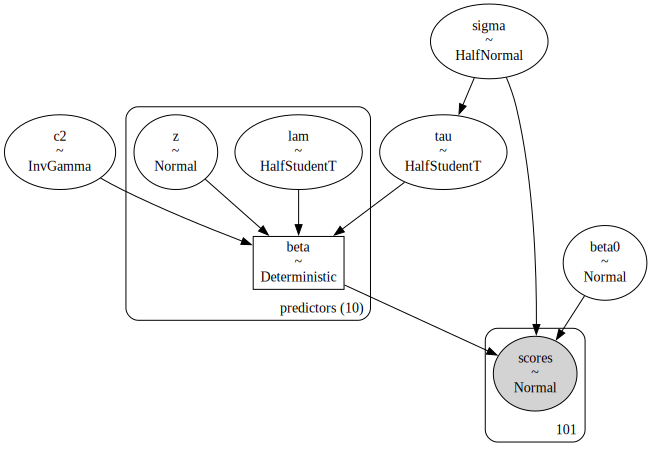

In [32]:
pm.model_to_graphviz(test_score_model)

在我们继续之前，让我们看看模型在看到任何数据之前做了什么。我们可以进行“先验预测采样”，从模型中生成模拟数据。然后，让我们将这些模拟结果与数据集中的实际测试分数进行比较。
>Before we proceed further, let's see what the model does before it sees any data. We can conduct *prior predictive sampling* to generate simulated data from the model. Then, let's compare these simulations to the actual test scores in the dataset.

In [33]:
with test_score_model:
    prior_samples = pm.sample_prior_predictive(100)

Sampling: [beta0, c2, lam, scores, sigma, tau, z]


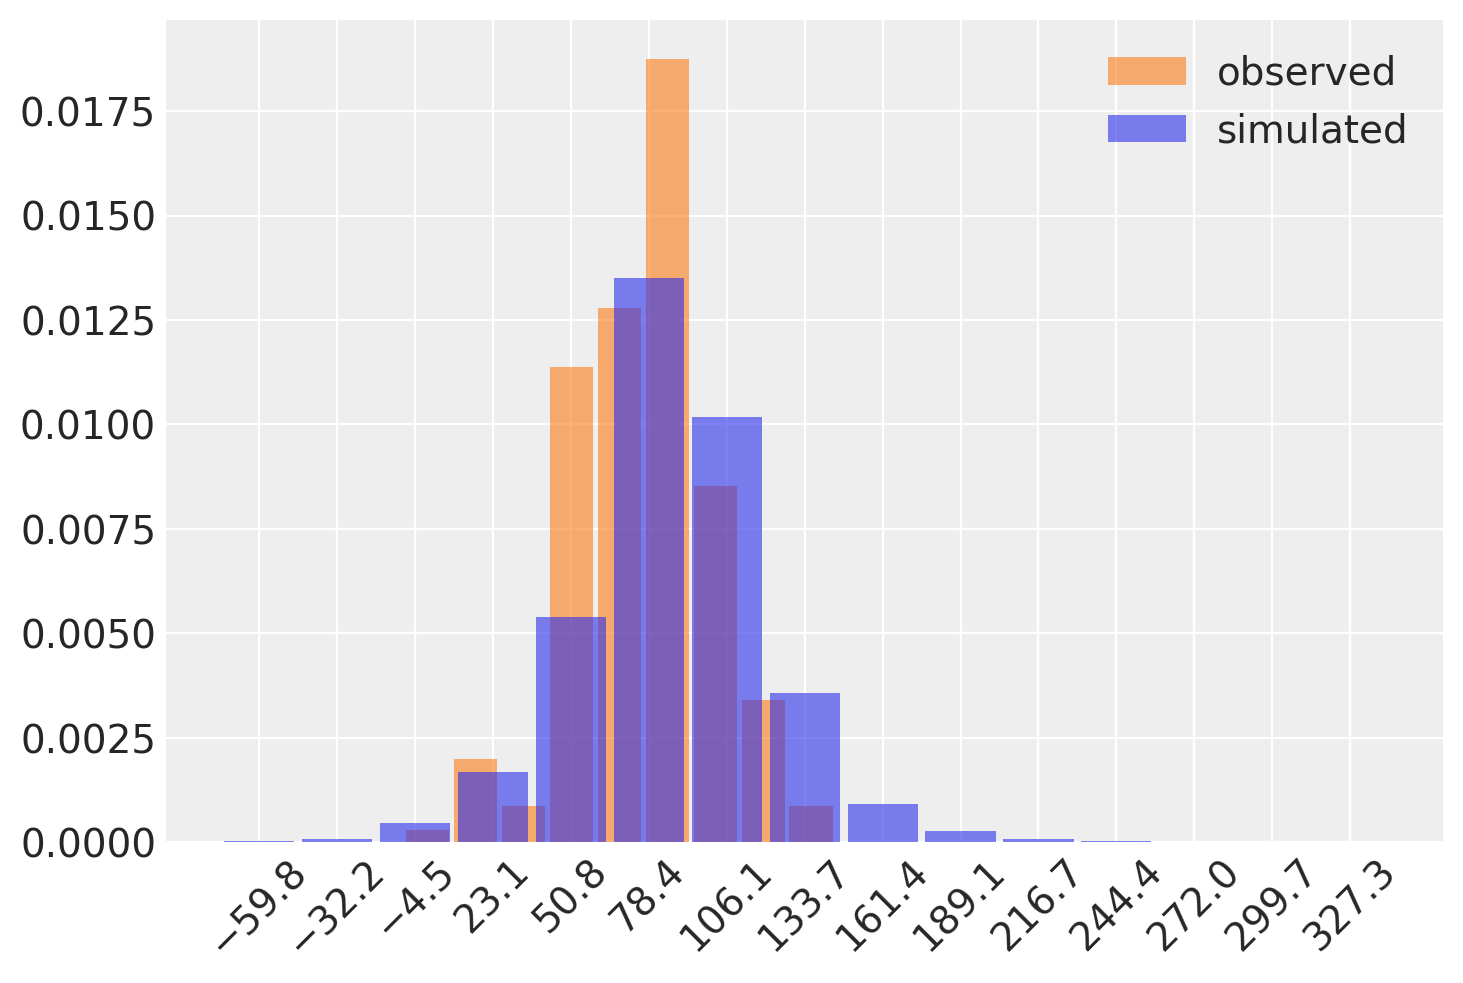

In [34]:
az.plot_dist(
    test_scores["score"].values,
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    prior_samples.prior_predictive["scores"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45);

我们怎么知道这是否合理?这需要一些问题的领域知识。在这里，我们试图预测考试成绩的结果。如果我们的模型预测的是数千个或大量的负值，同时排除了可信的分数，那么我们的模型就指定错误了。你可以在这里看到，模拟数据分布的支持与分数的观测分布的支持完全重叠;这是个好兆头!有一些是负值，还有一些可能大得不可信，但没什么好担心的。
>How do we know if this is reasonable or not? This requires some domain knowledge of the problem. Here, we are trying to predict the outcomes of test scores. If our model was predicting values in the thousands, or lots of negative values, while excluding scores that are plausible, then we have misspecified our model. You can see here that the support of the distribution of simulated data completely overlaps the support of the observed distribution of scores; this is a good sign! There are a few negative values and a few that are probably too large to be plausible, but nothing to worry about. 

### 模型拟合 Model Fitting
现在是最简单的部分: PyMC的“Inference Button”是对`sample`的调用。我们将让这个模型调优的时间比默认值(1000次迭代)稍微长一点。这使NUTS采样器有更多的时间来充分地调整自己。
>Now for the easy part: PyMC's "Inference Button" is the call to `sample`. We will let this model tune for a little longer than the default value (1000 iterations). This gives the NUTS sampler a little more time to tune itself adequately.

In [28]:
with test_score_model:

    idata = pm.sample(1000, tune=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 15 seconds.


注意，这里有一些关于分歧的警告。在这些样本中，NUTS无法在后验分布中做出有效的移动，因此得到的点可能不是来自后验的代表性样本。这个例子中没有太多，所以没有什么可担心的，但是让我们继续，按照建议将`target_accept`从默认值0.9增加到0.99。
>Notice that we have a few warnings here about divergences. These are samples where NUTS was not able to make a valid move across the posterior distribution, so the resulting points are probably not representative samples from the posterior. There aren't many in this example, so it's nothing to worry about, but let's go ahead and follow the advice and increase `target_accept` from its default value of 0.9 to 0.99.

In [43]:
with test_score_model:

    idata = pm.sample(1000, tune=2000, random_seed=42, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 15 seconds.


由于目标接受率较大，该算法对其跨越式步骤更加保守，使其更小。我们为此付出的代价是，每个样本都需要更长的时间来完成。然而，警告现在消失了，我们有了一个干净的后验样本!
>Since the target acceptance rate is larger, the algorithm is being more conservative with its leapfrog steps, making them smaller. The price we pay for this is that each sample takes longer to complete. However, the warnings are now gone, and we have a clean posterior sample!

#### 模型检查 Model Checking
模型检查的一个简单的第一步是通过查看单变量潜在参数的跟踪图来检查我们的样本，以检查明显的问题。这些名称可以传递给`var_names`参数中的` plot_trace`。
>A simple first step in model checking is to visually inspect our samples by looking at the traceplot for the univariate latent parameters to check for obvious problems. These names can be passed to `plot_trace` in the `var_names` argument.

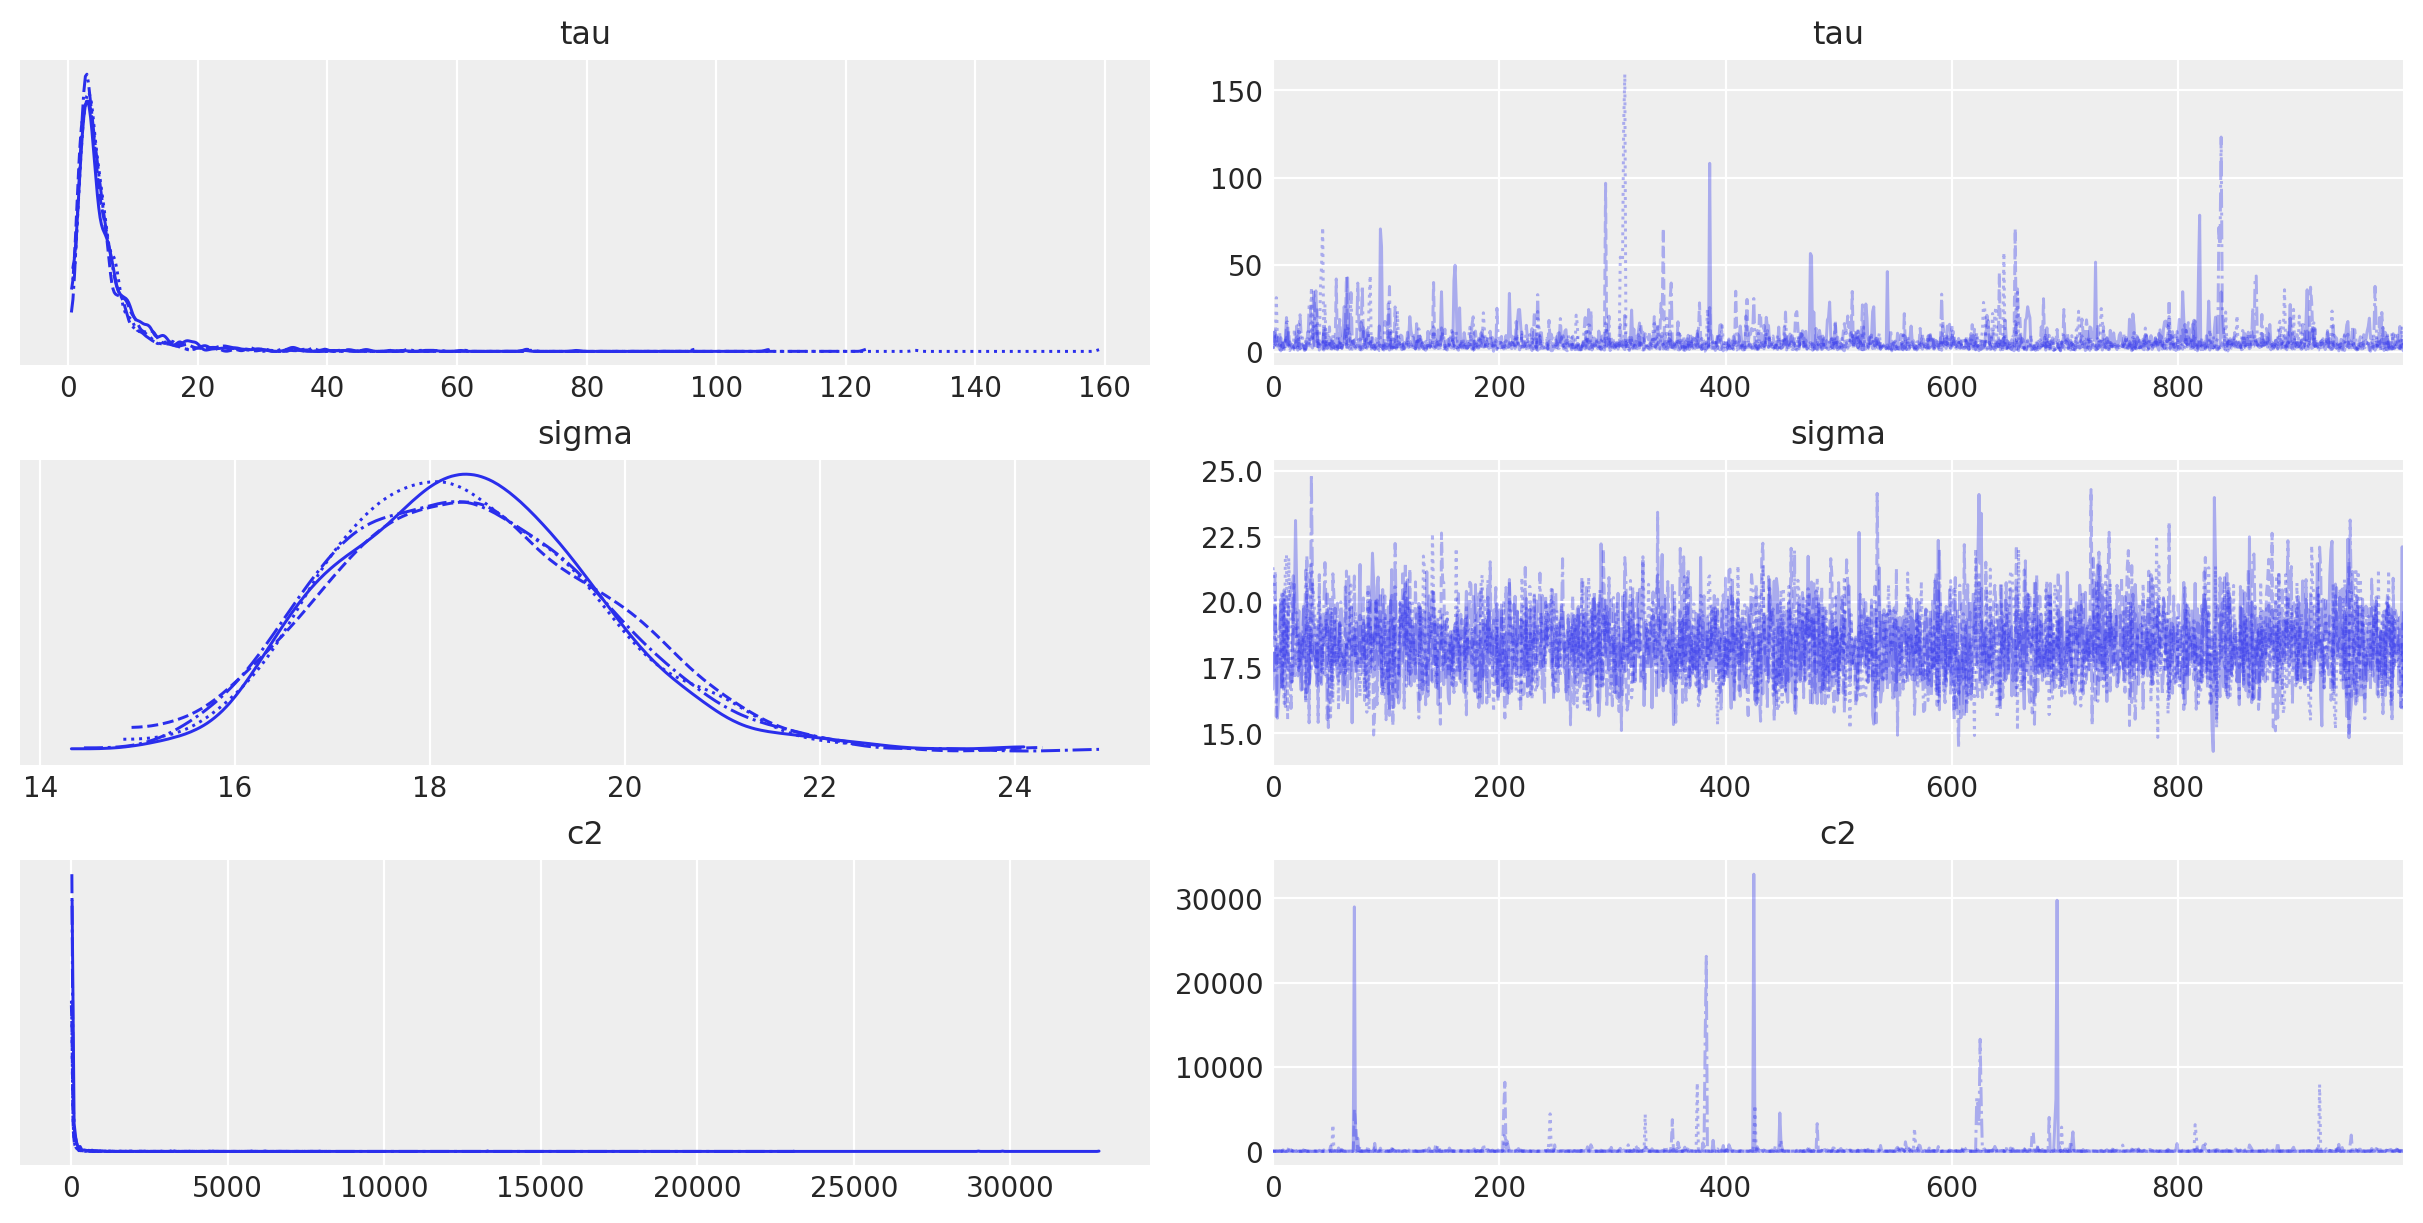

In [36]:
az.plot_trace(idata, var_names=["tau", "sigma", "c2"]);

这些看起来还好吗?好吧，每个参数左边的每个密度看起来都非常相似，这意味着它们收敛到相同的后验分布(不管它是否正确)。右边轨迹图的同质性也是一个好迹象;采样值的时间序列没有趋势或模式。请注意，`c2`和`tau`偶尔会抽样极端值，但这是重尾分布的预期结果。
>Do these look okay? Well, each of the densities on the left side for each parameter look pretty similar to the others, which means they have converged to the same posterior distribution (be it the correct one or not). The homogeneity of the trace plots on the right are also a good sign; there is no trend or pattern to the time series of sampled values. Note that `c2` and `tau` occasionally sample extreme values, but this is expected from heavy-tailed distributions. 


下一个简单的模型检查步骤是查看NUTS采样器是否按预期执行。能量图是一种检查NUTS算法是否能够充分探索后验分布的方法。如果不是这样，当后验部分没有以足够的频率访问时，就会有偏后验估计的风险。该图显示了两个密度估计: 一个是抽样运行的边际能量分布，另一个是步骤之间能量转换的分布。这有点抽象，但我们所寻找的只是让分布彼此相似。我们的看起来还不错。
>The next easy model-checking step is to see if the NUTS sampler performed as expected. An energy plot is a way of checking if the NUTS algorithm was able to adequately explore the posterior distribtion. If it was not, one runs the risk of biased posterior estimates when parts of the posterior are not visited with adequate frequency. The plot shows two density estimates: one is the marginal energy distribution of the sampling run and the other is the distribution of the energy transitions between steps. This is all a little abstract, but all we are looking for is for the distributions to be similar to one another. Ours does not look too bad.

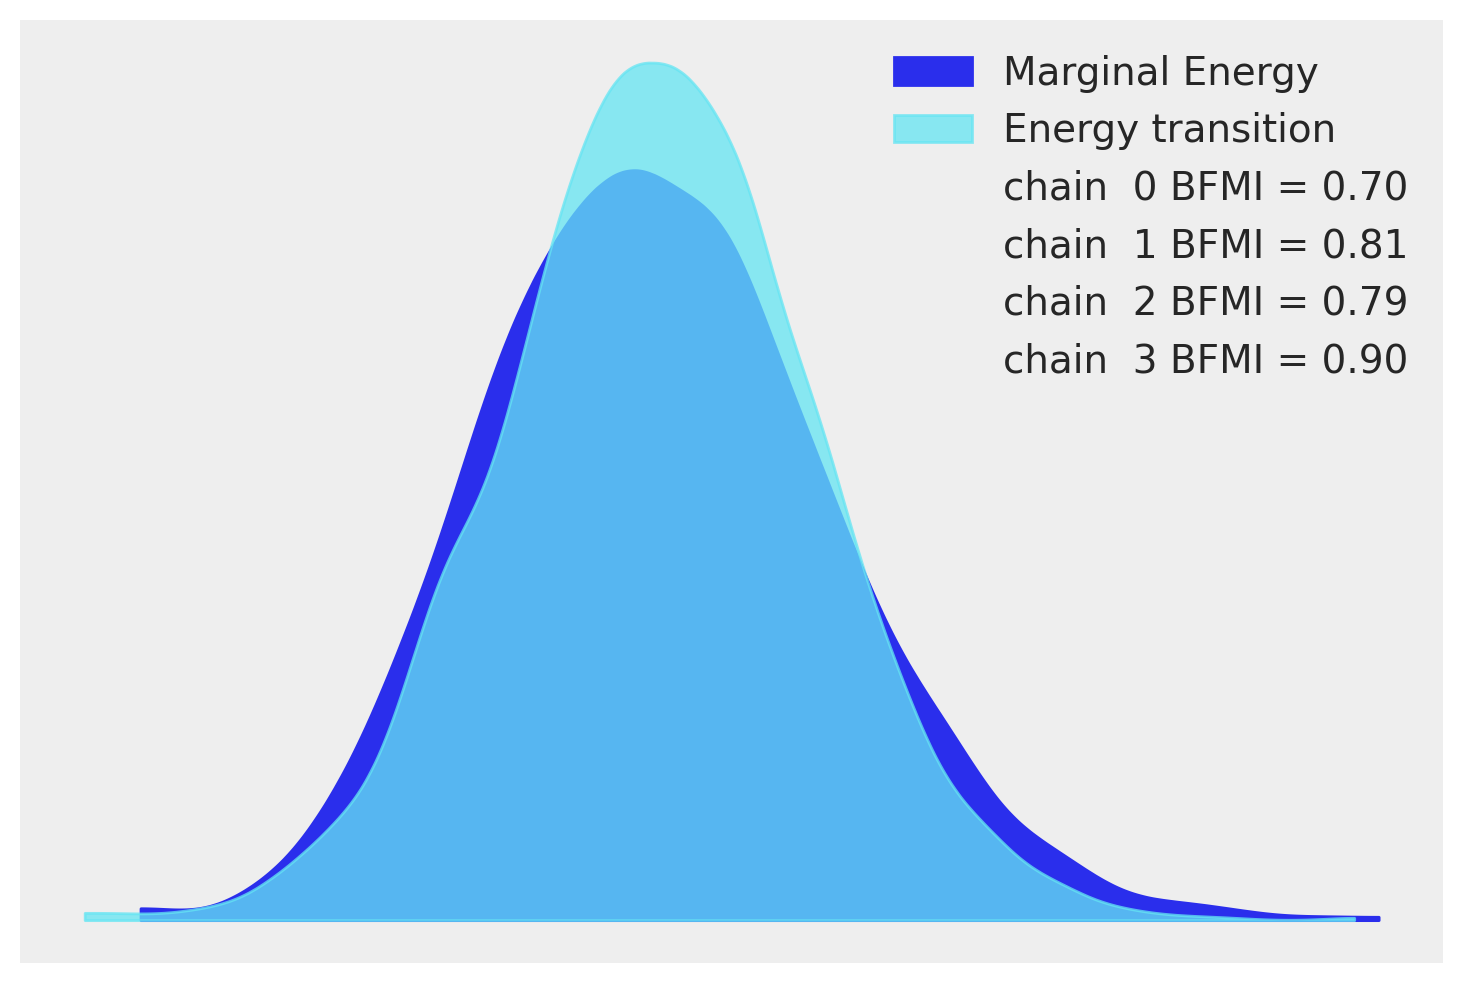

In [37]:
az.plot_energy(idata);

最终，我们对“beta”的估计感兴趣，这是一组预测系数。将`beta`传递给`plot_trace`将生成一个非常拥挤的图，因此我们将使用`plot_forest`来代替，它被设计用来处理向量值参数。
>Ultimately, we are interested in the estimates of `beta`, the set of predictor coefficients. Passing `beta` to `plot_trace` would generate a very crowded plot, so we will use `plot_forest` instead, which is designed to handle vector-valued parameters.

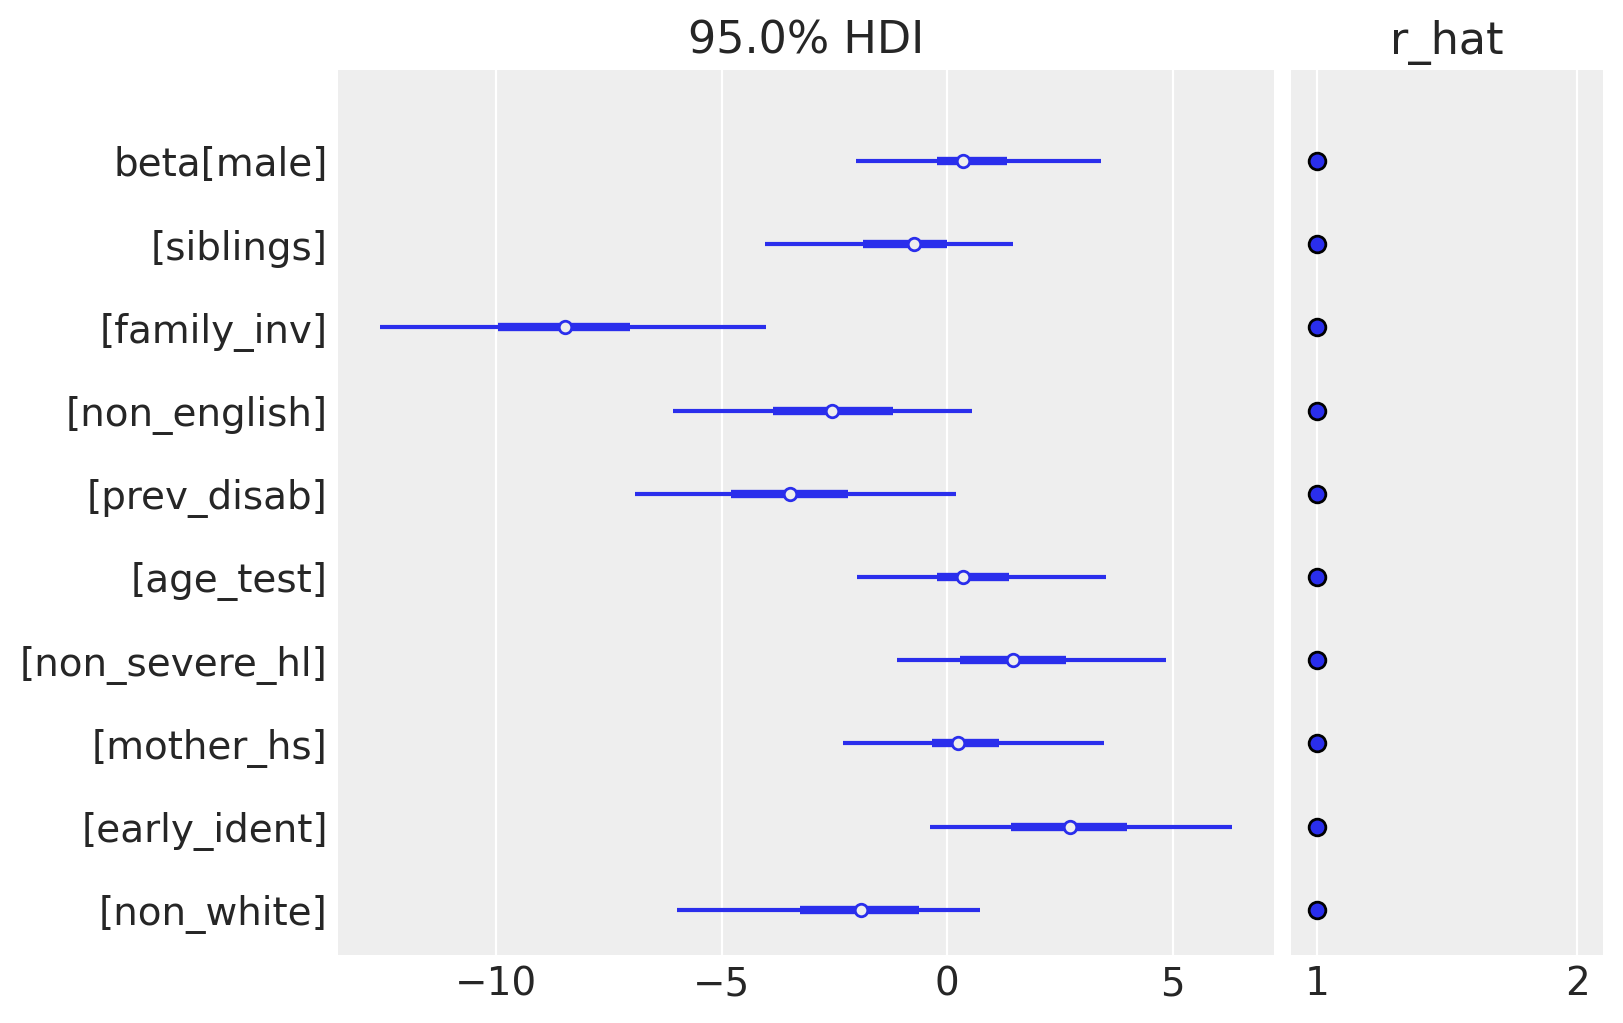

In [38]:
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True);

系数的后验分布揭示了一些似乎对预测考试成绩很重要的因素。家庭投入(`family_inv`)是大而负的，这意味着分数越高(与投入程度越低有关)，测试成绩就会差得多。另一方面，早期发现听力障碍是积极的，这意味着早期发现问题会带来更好的教育结果，这也是直观的。请注意，其他变量，特别是性别(`male`)、测试年龄(`age_test`)和母亲的教育状况(`mother_hs`)都被缩减为零。
>The posterior distribution of coefficients reveal some factors that appear to be important in predicting test scores. Family involvement (`family_inv`) is large and negative, meaning a larger score (which is related to poorer involvement) results in much worse test scores. On the other end, early identification of hearing impairment is positive, meaning that detecting a problem early results in better educational outcomes down the road, which is also intuitive. Notice that other variables, notably gender (`male`), age at testing (`age_test`), and the mother's educational status (`mother_hs`) have all been shrunk essentially to zero.

## 案例研究2: 煤矿灾难 Coal mining disasters


考虑以下从1851年到1962年在英国记录的煤矿灾难的时间序列(Jarrett, 1979)。灾难的数量被认为受到了这一时期安全法规变化的影响。不幸的是，我们还有两年的数据丢失，在pandas的`Series`中被一个`nan`识别为丢失。PyMC将自动输入这些缺失的值。

接下来，我们将为这个系列构建一个模型，并尝试估计变化发生的时间。同时，我们将看到如何处理缺失数据，使用多个采样器和从离散随机变量中采样。
>Consider the following time series of recorded coal mining disasters in the UK from 1851 to 1962 (Jarrett, 1979). The number of disasters is thought to have been affected by changes in safety regulations during this period. Unfortunately, we also have a pair of years with missing data, identified as missing by a `nan` in the pandas `Series`. These missing values will be automatically imputed by PyMC. 
>
>Next we will build a model for this series and attempt to estimate when the change occurred. At the same time, we will see how to handle missing data, use multiple samplers and sample from discrete random variables. 

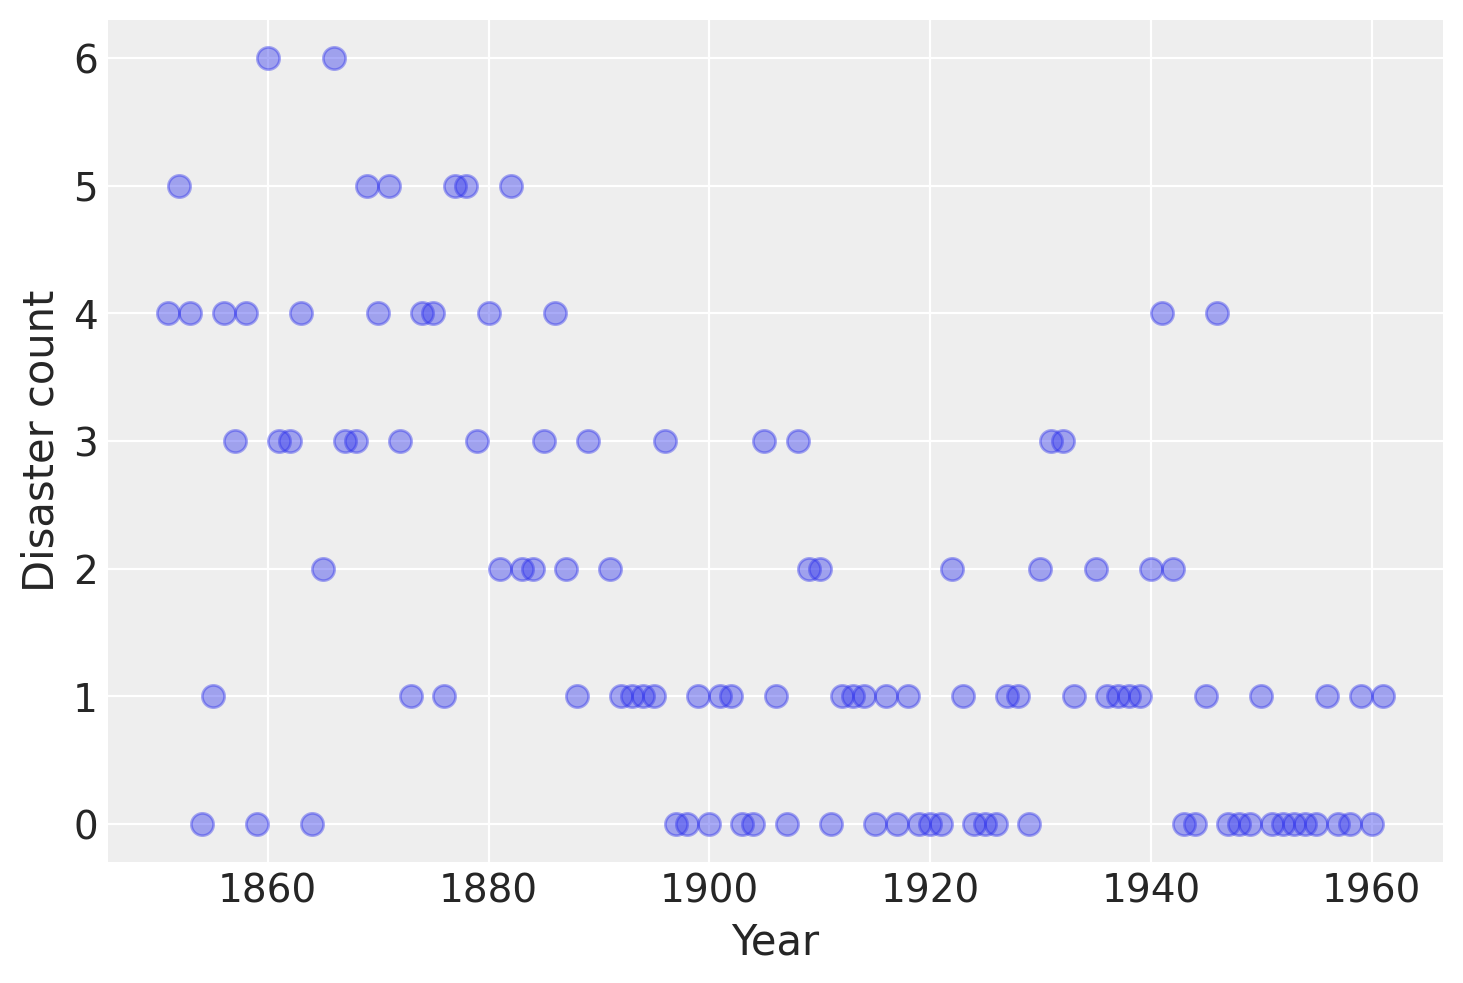

In [39]:
# fmt: off
disaster_data = pd.Series(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
    3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
    2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
    1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
    0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
    3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
)
# fmt: on
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, "o", markersize=8, alpha=0.4)
plt.ylabel("Disaster count")
plt.xlabel("Year");

时间序列中的灾害发生被认为是遵循时间序列早期速率参数较大，后期速率参数较小的泊松过程。我们感兴趣的是找到系列中的变化点，这可能与采矿安全法规的变化有关。
>Occurrences of disasters in the time series is thought to follow a Poisson process with a large rate parameter in the early part of the time series, and from one with a smaller rate in the later part. We are interested in locating the change point in the series, which is perhaps related to changes in mining safety regulations.



在我们的模型中, 

$$ 
\begin{aligned}  
  D_t &\sim \text{Pois}(r_t), r_t= \begin{cases} 
   e, & \text{if } t \le s \\
   l, & \text{if } t \gt s 
   \end{cases} \\
  s &\sim \text{Unif}(t_l, t_h)\\         
  e &\sim \text{exp}(1)\\
  l &\sim \text{exp}(1)    
\end{aligned}
$$

以下是参数的定义: 
   * $D_t$: The number of disasters in year $t$
   * $r_t$: The rate parameter of the Poisson distribution of disasters in year $t$.
   * $s$: The year in which the rate parameter changes (the switchpoint).
   * $e$: The rate parameter before the switchpoint $s$.
   * $l$: The rate parameter after the switchpoint $s$.
   * $t_l$, $t_h$: The lower and upper boundaries of year $t$.

这个模型的构建与我们之前的模型非常相似。主要区别是引入了具有泊松和离散均匀先验的离散变量，以及确定性随机变量`rate`的新形式。
>This model is built much like our previous models. The major differences are the introduction of discrete variables with the Poisson and discrete-uniform priors and the novel form of the deterministic random variable `rate`.

In [40]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform("switchpoint", lower=years.min(), upper=years.max())

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential("early_rate", 1.0)
    late_rate = pm.Exponential("late_rate", 1.0)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson("disasters", rate, observed=disaster_data)

/Users/izhangxm/.envs/babaydata/lib/python3.9/site-packages/pymc/model.py:1378: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


`rate` 随机变量的逻辑，
```python
rate = switch(switchpoint >= year, early_rate, late_rate)
```
使用' switch '实现，这是一个工作方式类似于if语句的函数。它使用第一个参数在接下来的两个参数之间切换。
>is implemented using `switch`, a function that works like an if statement. It uses the first argument to switch between the next two arguments.

在创建观察到的随机随机变量时，通过将带有NaN值的NumPy `~numpy.MaskedArray`或 `~pandas.DataFrame`传递给`observed`参数，可以透明地处理缺失值。在幕后，创建了另一个随机变量`disasters.missing_values`来模拟缺失的数值。
>Missing values are handled transparently by passing a NumPy `~numpy.MaskedArray` or a  `~pandas.DataFrame` with NaN values to the `observed` argument when creating an observed stochastic random variable. Behind the scenes, another random variable, `disasters.missing_values` is created to model the missing values.


不幸的是，由于它们是离散变量，因此没有有意义的梯度，我们不能使用NUTS对`switchpoint` 或缺失的灾难观测进行采样。相反，我们将使用`~pymc.Metropolis`的方法，它实现了自适应`Metropolis- hastings`，因为它被设计为处理离散值。PyMC自动分配正确的采样算法。
>Unfortunately, because they are discrete variables and thus have no meaningful gradient, we cannot use NUTS for sampling `switchpoint` or the missing disaster observations. Instead, we will sample using a `~pymc.Metropolis` step method, which implements adaptive Metropolis-Hastings, because it is designed to handle discrete values. PyMC automatically assigns the correct sampling algorithms.

In [41]:
with disaster_model:
    idata = pm.sample(10000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [switchpoint]
>>Metropolis: [disasters_missing]
>NUTS: [early_rate, late_rate]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 6 seconds.


在下面的轨迹图中，我们可以看到大约有10年的跨度是安全方面可能发生重大变化的，但5年的跨度包含了大部分的概率质量。由于年开关点与似然之间的跳跃关系，分布呈锯齿状;锯齿状不是由于抽样误差造成的。
>In the trace plot below we can see that there's about a 10 year span that's plausible for a significant change in safety, but a 5 year span that contains most of the probability mass. The distribution is jagged because of the jumpy relationship between the year switchpoint and the likelihood; the jaggedness is not due to sampling error.

/Users/izhangxm/.envs/babaydata/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


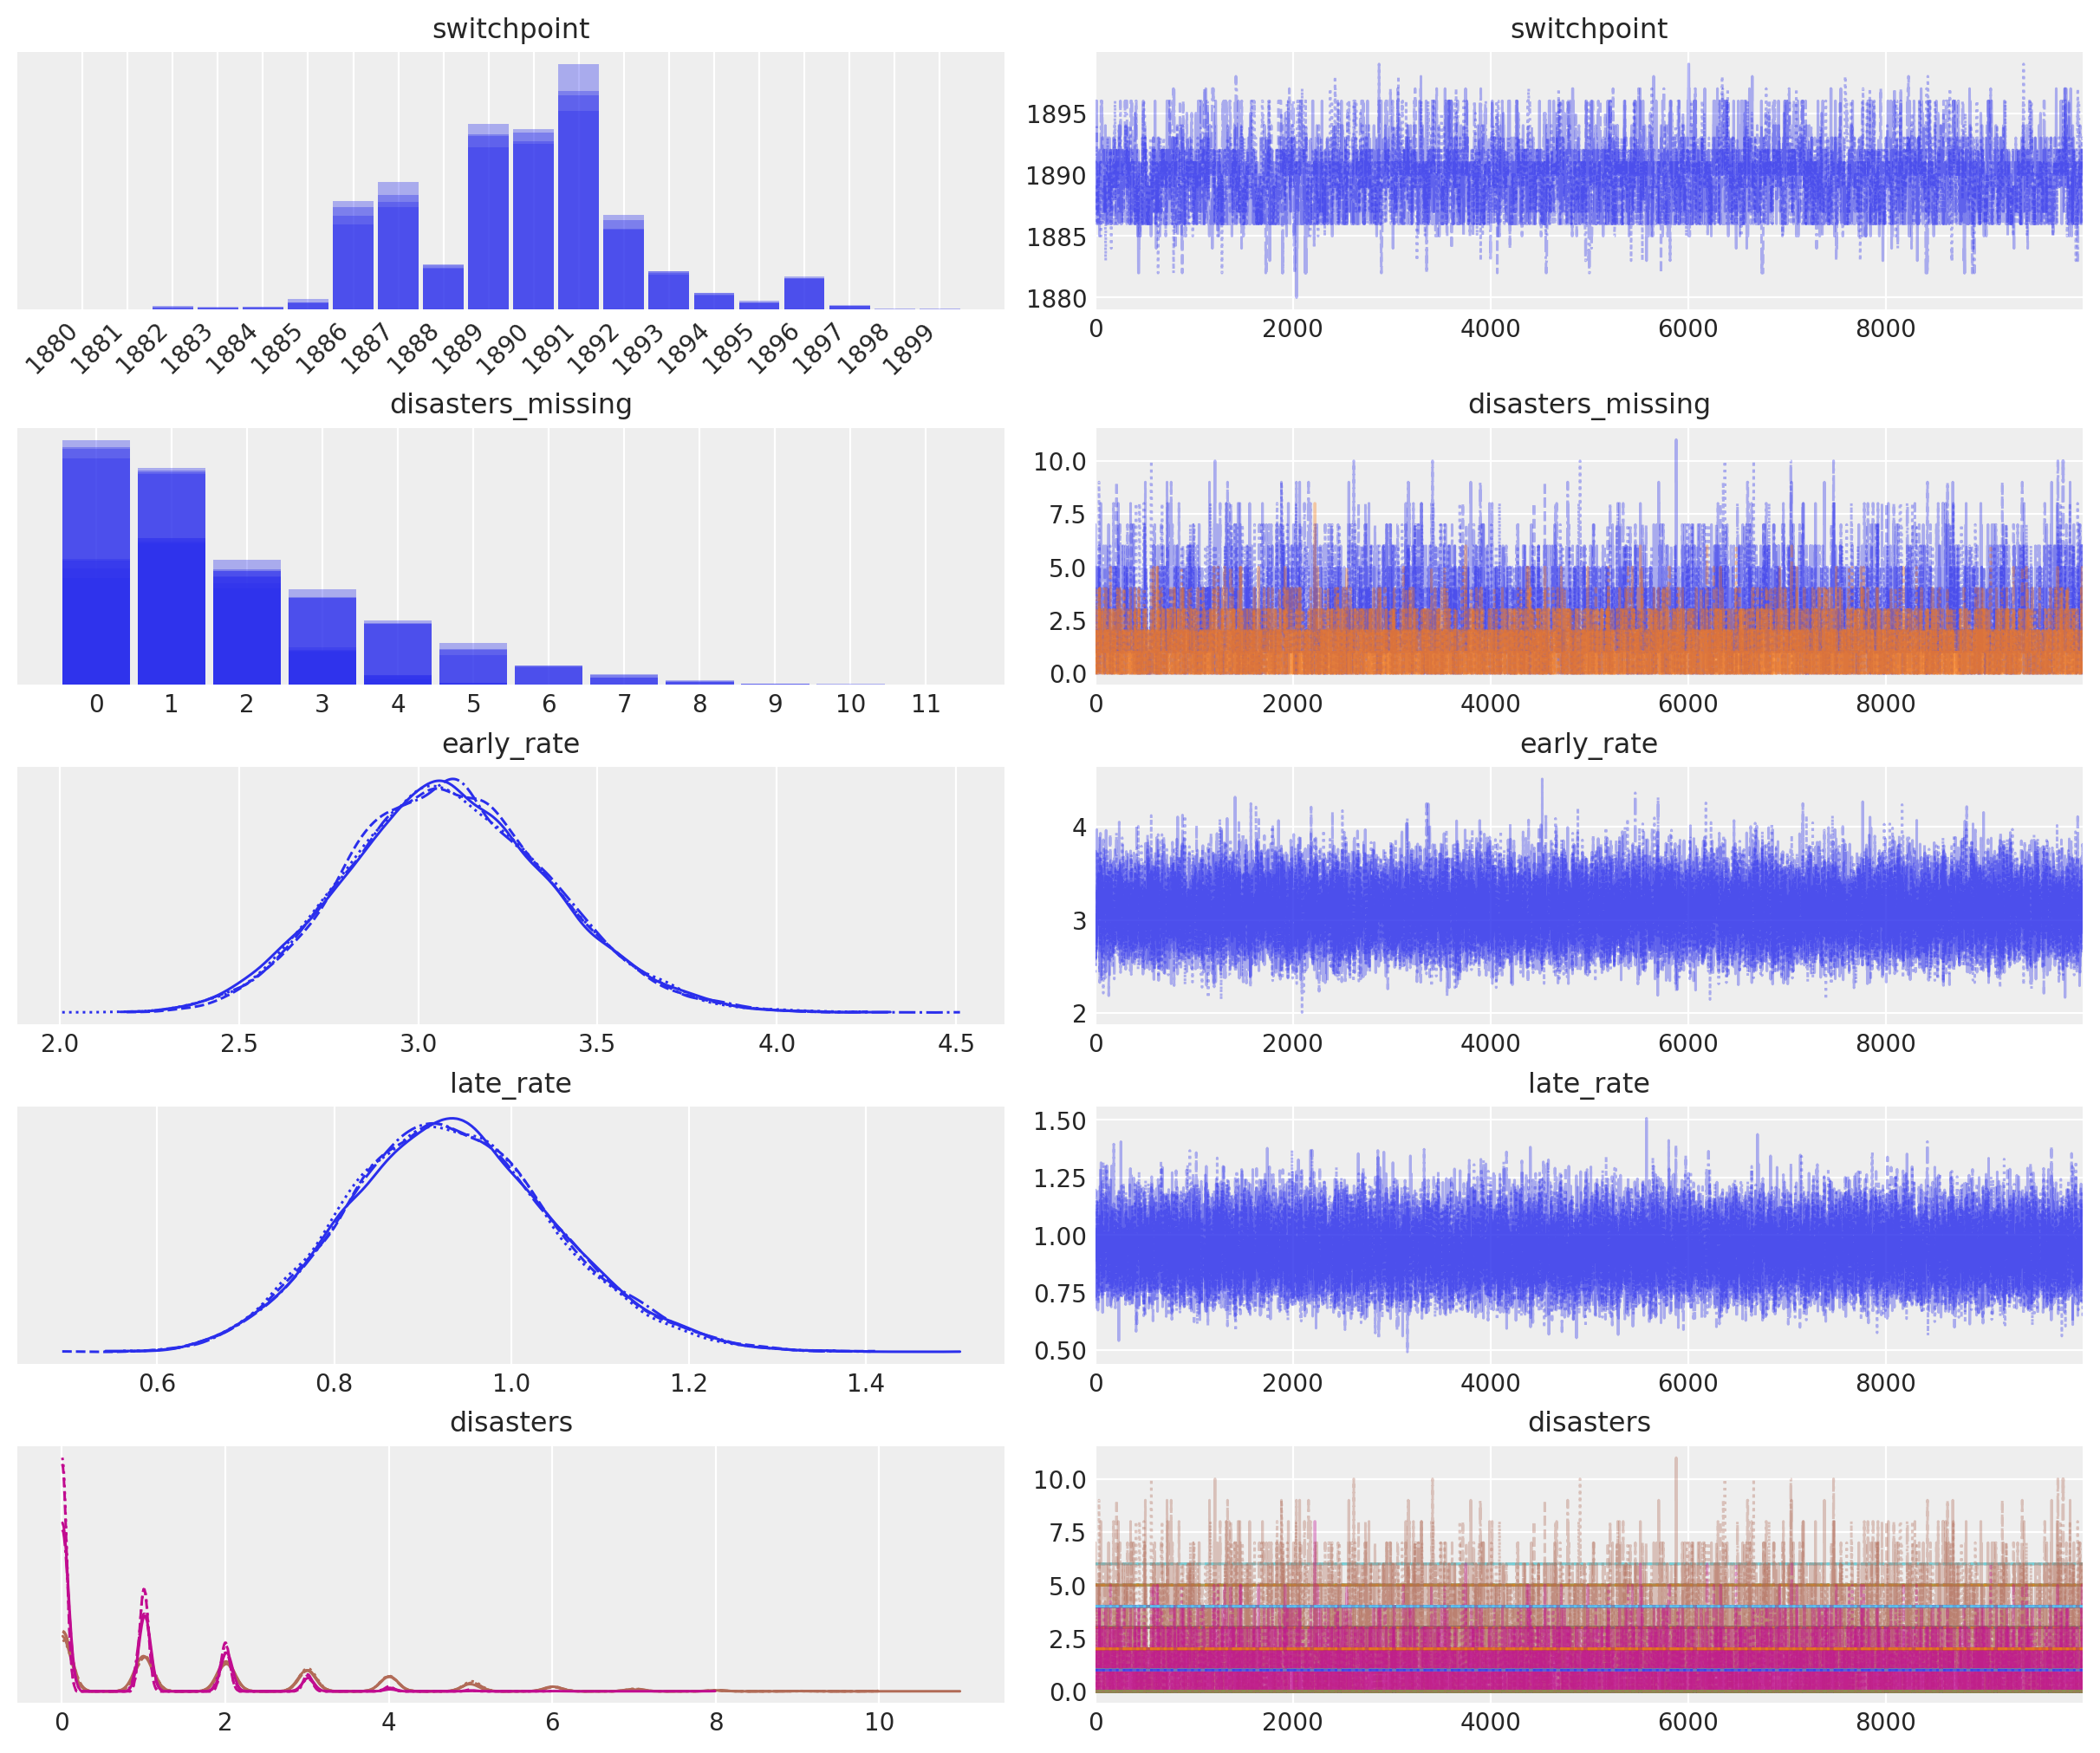

In [42]:
axes_arr = az.plot_trace(idata)
plt.draw()
for ax in axes_arr.flatten():
    if ax.get_title() == "switchpoint":
        labels = [label.get_text() for label in ax.get_xticklabels()]
        ax.set_xticklabels(labels, rotation=45, ha="right")
        break
plt.draw()

注意，`rate`随机变量没有出现在跟踪中。在这种情况下，这很好，因为它本身并不有趣。还记得在前面的示例中，我们将通过将变量包装在`~pymc.Deterministic`中来跟踪变量，并给它一个名字。下图显示开关点为橙色垂直线，其最高后验密度(HPD)为半透明带。虚线表示事故率。
>Note that the `rate` random variable does not appear in the trace.  That is fine in this case, because it is not of interest in itself.  Remember from the previous example, we would trace the variable by wrapping it in a`~pymc.Deterministic` class, and giving it a name. The following plot shows the switch point as an orange vertical line, together with its highest posterior density (HPD) as a semitransparent band. The dashed black line shows the accident rate.

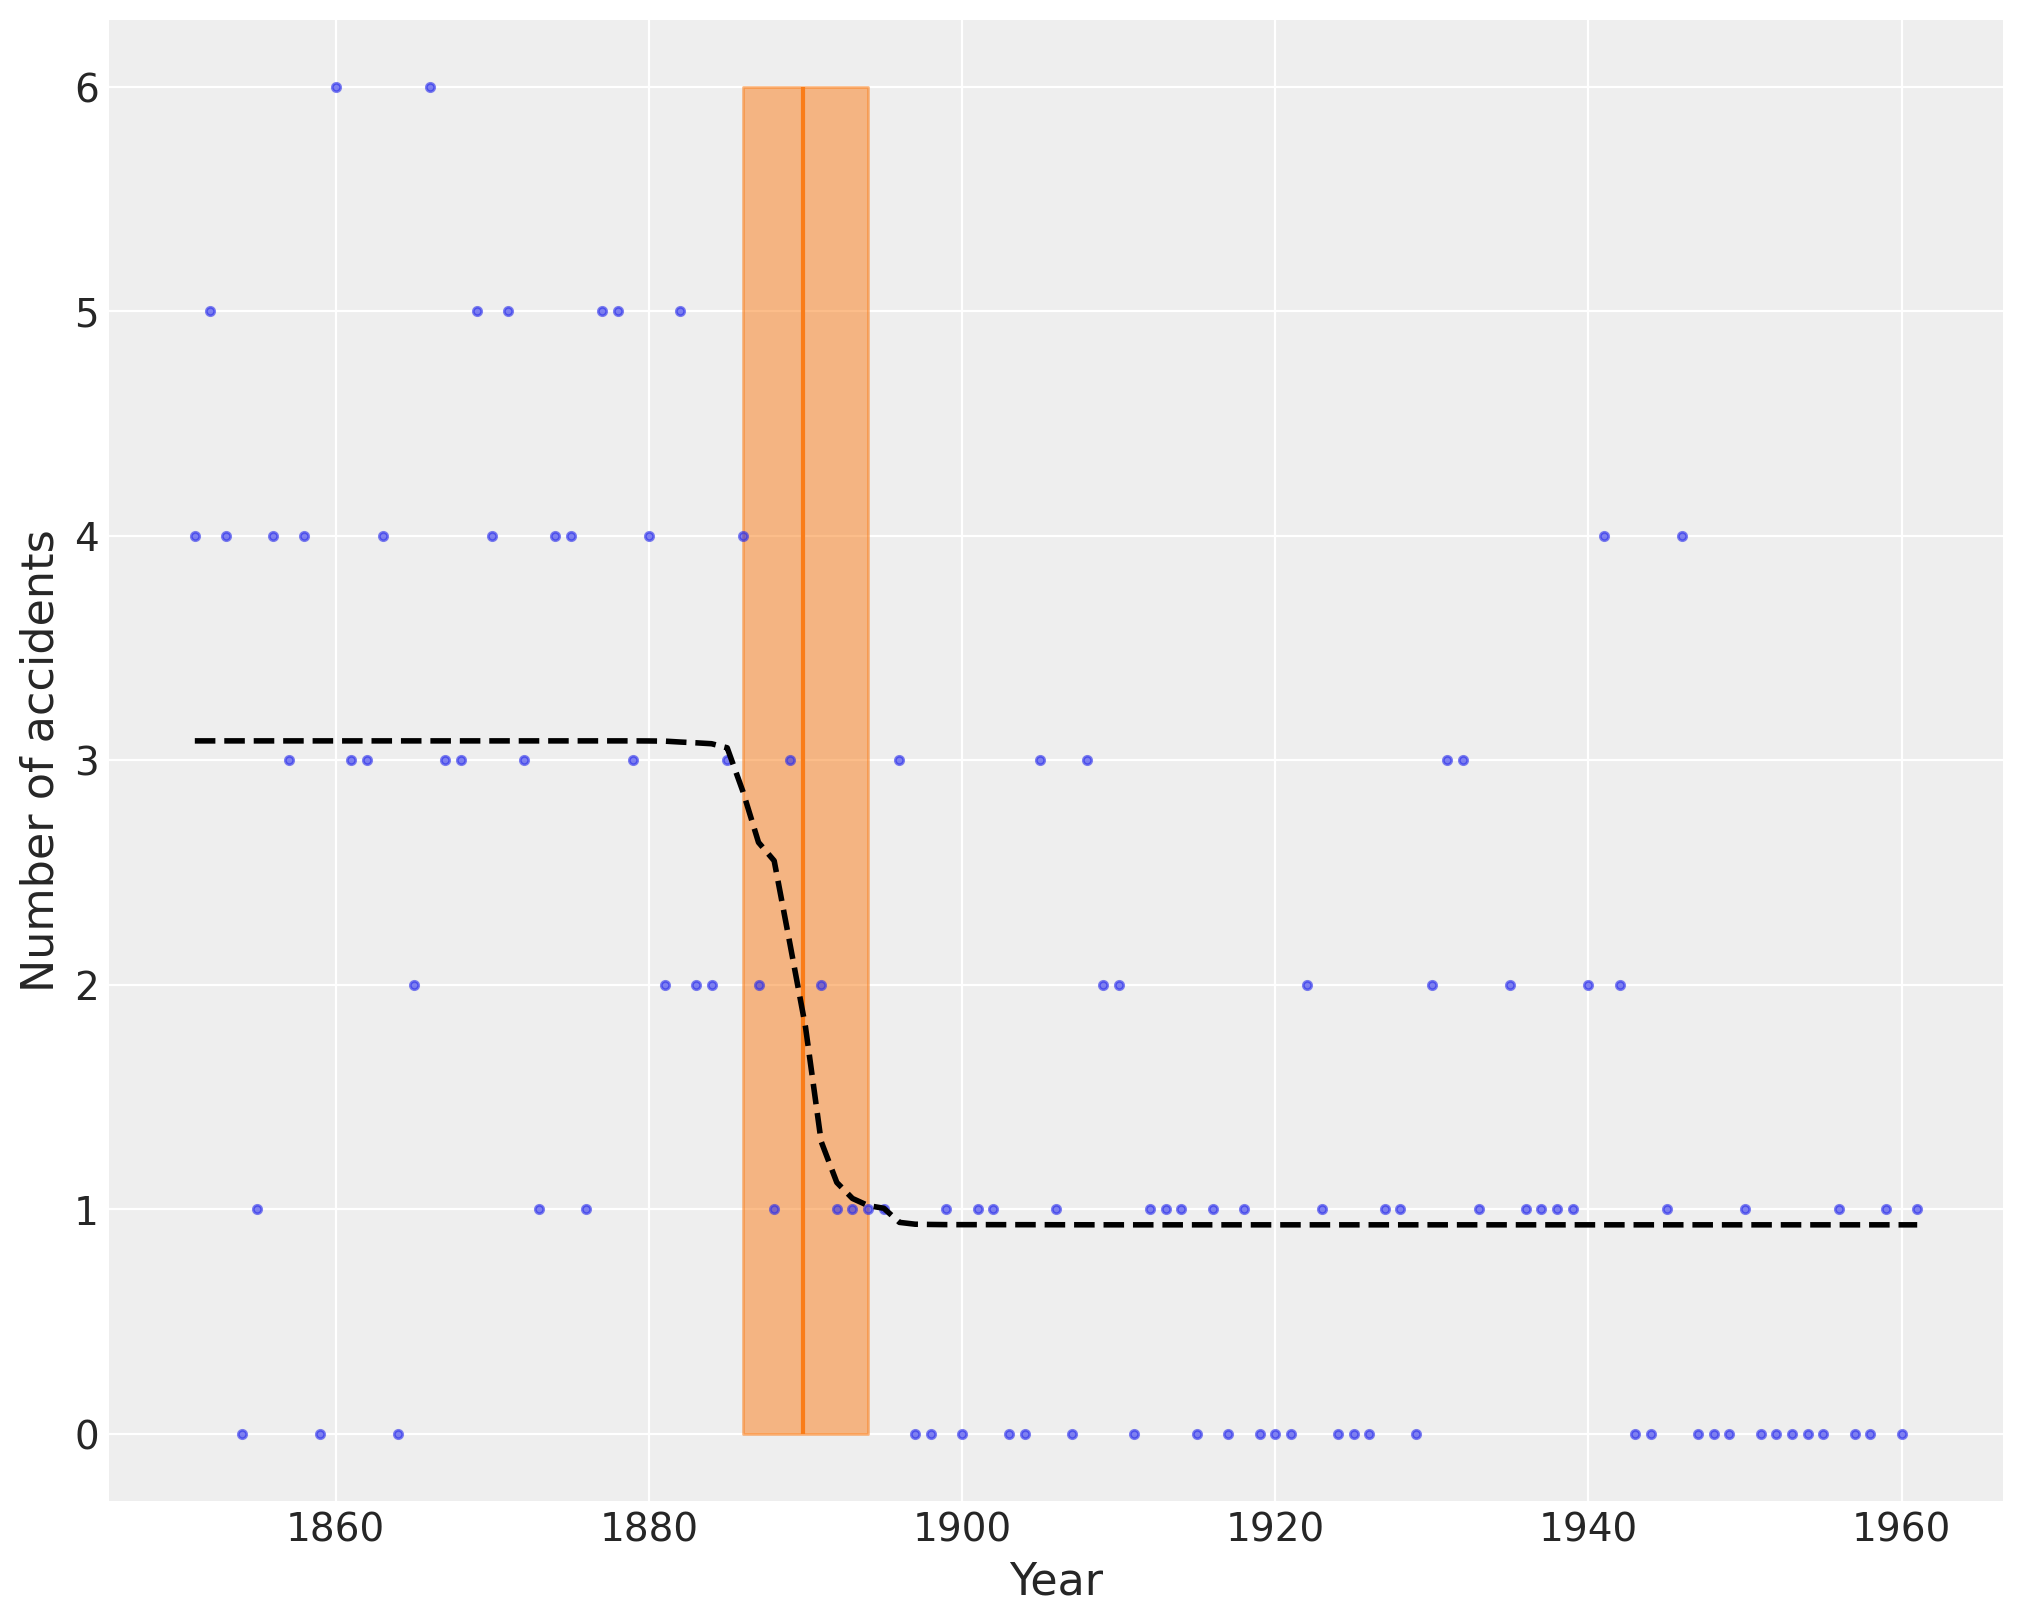

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, ".", alpha=0.6)
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

trace = idata.posterior.stack(draws=("chain", "draw"))

plt.vlines(trace["switchpoint"].mean(), disaster_data.min(), disaster_data.max(), color="C1")
average_disasters = np.zeros_like(disaster_data, dtype="float")
for i, year in enumerate(years):
    idx = year < trace["switchpoint"]
    average_disasters[i] = np.mean(np.where(idx, trace["early_rate"], trace["late_rate"]))

sp_hpd = az.hdi(idata, var_names=["switchpoint"])["switchpoint"].values
plt.fill_betweenx(
    y=[disaster_data.min(), disaster_data.max()],
    x1=sp_hpd[0],
    x2=sp_hpd[1],
    alpha=0.5,
    color="C1",
)
plt.plot(years, average_disasters, "k--", lw=2);

## 任意确定性 Arbitrary deterministics
由于对PyTensor的依赖，PyMC提供了许多将随机变量转换为新随机变量的数学函数和运算符。然而，PyTensor中的函数库并不详尽，因此PyTensor和PyMC提供了在纯Python中创建任意函数的功能，并在PyMC模型中包含这些函数。`as_op`函数装饰器支持这一点。

PyTensor需要知道函数的输入和输出的类型，这些类型由输入的`itypes`和输出的`otypes`指定为`as_op`。

>Due to its reliance on PyTensor, PyMC provides many mathematical functions and operators for transforming random variables into new random variables. However, the library of functions in PyTensor is not exhaustive, therefore PyTensor and PyMC provide functionality for creating arbitrary functions in pure Python, and including these functions in PyMC models. This is supported with the `as_op` function decorator.
>
>PyTensor needs to know the types of the inputs and outputs of a function, which are specified for `as_op` by `itypes` for inputs and `otypes` for outputs. 

In [5]:
from pytensor.compile.ops import as_op
import pytensor.tensor as at

@as_op(itypes=[at.lscalar], otypes=[at.lscalar])
def crazy_modulo3(value):
    if value > 0:
        return value % 3
    else:
        return (-value + 1) % 3


with pm.Model() as model_deterministic:
    a = pm.Poisson("a", 1)
    b = crazy_modulo3(a)

TypeError: Invalid input types for Op FromFunctionOp{crazy_modulo3}:
Input 1/1: Expected TensorType(int64, ()), got TensorType(int64, ())

这种方法的一个重要缺点是，pytensor不可能检查这些函数以计算基于哈密顿的采样器所需的梯度。因此，对于使用这种操作符的模型，不可能使用HMC或NUTS采样器。但是，如果继承自`~pytensor`，则可以添加梯度。而不是使用`as_op`。PyMC示例集包括[一个更详细的as_op使用示例](https://github.com/pymc-devs/pymc-examples/blob/main/examples/case_studies/disaster_model_theano_op.py)。
An important drawback of this approach is that it is not possible for `pytensor` to inspect these functions in order to compute the gradient required for the Hamiltonian-based samplers. Therefore, it is not possible to use the HMC or NUTS samplers for a model that uses such an operator. However, it is possible to add a gradient if we inherit from `~pytensor.Op` instead of using `as_op`. The PyMC example set includes [a more elaborate example of the usage of as_op](https://github.com/pymc-devs/pymc-examples/blob/main/examples/case_studies/disaster_model_theano_op.py).

## 任意分布 Arbitrary distributions
类似地，PyMC中的统计分布库也不是详尽的，但是PyMC允许为任意概率分布创建用户定义的函数。对于简单的统计分布，`~pymc. xmlDensityDist`类将任何计算log概率$log(p(x))$的函数作为参数。这个函数在计算中可以使用其他随机变量。下面是一个受Jake Vanderplas博客文章启发的例子，关于线性回归的先验(Vanderplas, 2014)。
>Similarly, the library of statistical distributions in PyMC is not exhaustive, but PyMC allows for the creation of user-defined functions for an arbitrary probability distribution. For simple statistical distributions, the `~pymc.DensityDist` class takes as an argument any function that calculates a log-probability $log(p(x))$. This function may employ other random variables in its calculation. Here is an example inspired by a blog post by Jake Vanderplas on which priors to use for a linear regression (Vanderplas, 2014). 


```python
import pytensor.tensor as at

with pm.Model() as model:
    alpha = pm.Uniform('intercept', -100, 100)
    
    # Create custom densities
    beta = pm.DensityDist('beta', logp=lambda value: -1.5 * at.log(1 + value**2))
    eps = pm.DensityDist('eps', logp=lambda value: -at.log(at.abs_(value)))
    
    # Create likelihood
    like = pm.Normal('y_est', mu=alpha + beta * X, sigma=eps, observed=Y)
```


对于更复杂的分布，可以创建`~pymc.Continuous`  or  `~pymc.Discrete`并根据需要提供自定义的`logp`函数。这就是PyMC中内置分布的指定方式。例如，心理学和天体物理学等领域对特定过程有复杂的似然函数，可能需要数值逼近。

下面显示了将上面的`beta`变量实现为`Continuous`子类，以及相关的 `~pytensor.RandomVariable`对象，其实例成为分布的属性。

>For more complex distributions, one can create a subclass of `~pymc.Continuous` or `~pymc.Discrete` and provide the custom `logp` function, as required. This is how the built-in distributions in PyMC are specified. As an example, fields like psychology and astrophysics have complex likelihood functions for particular processes that may require numerical approximation. 
>
>Implementing the `beta` variable above as a `Continuous` subclass is shown below, along with an associated `~pytensor.RandomVariable` object, an instance of which becomes an attribute of the distribution.

In [44]:
class BetaRV(at.random.op.RandomVariable):
    name = "beta"
    ndim_supp = 0
    ndims_params = []
    dtype = "floatX"

    @classmethod
    def rng_fn(cls, rng, size):
        raise NotImplementedError("Cannot sample from beta variable")


beta = BetaRV()

In [45]:
class Beta(pm.Continuous):

    rv_op = beta

    @classmethod
    def dist(cls, mu=0, **kwargs):
        mu = at.as_tensor_variable(mu)
        return super().dist([mu], **kwargs)

    def logp(self, value):
        mu = self.mu
        return beta_logp(value - mu)


def beta_logp(value):
    return -1.5 * at.log(1 + (value) ** 2)


with pm.Model() as model:
    beta = Beta("beta", mu=0)

如果你的logp不能在PyTensor中表达，你可以用`as_op`来装饰这个函数，如下所示:`@as_op(itypes=[at.dscalar], otypes=[at.dscalar])`。注意，这将创建一个黑盒Python函数，该函数将慢得多，并且不能提供例如NUTS所需的渐变。

If your logp can not be expressed in PyTensor, you can decorate the function with `as_op` as follows: `@as_op(itypes=[at.dscalar], otypes=[at.dscalar])`. Note, that this will create a blackbox Python function that will be much slower and  not provide the gradients necessary for e.g. NUTS.

## Discussion
概率规划是统计学习中的一个新兴范式，其中贝叶斯建模是一个重要的子学科。概率规划的特征——将变量指定为概率分布，并根据其他变量和观察结果对变量进行条件反射——使其成为在各种设置和模型复杂性范围内构建模型的强大工具。随着概率规划的兴起，贝叶斯模型的拟合方法也出现了创新，这些方法比现有的MCMC方法有了显著的改进。然而，尽管有了这种扩展，很少有可用的软件包能够跟上方法创新的步伐，更少的是允许非专业用户实现模型。

PyMC为定量研究人员灵活而简洁地实现统计模型提供了一个概率编程平台。一个庞大的统计分布库和几个预定义的拟合算法允许用户专注于手头的科学问题，而不是贝叶斯建模的实现细节。选择Python作为开发语言，而不是特定于领域的语言，意味着PyMC用户能够使用一种易于学习的动态高级编程语言，以交互方式构建模型、内省模型对象、调试或分析他们的工作。PyMC的模块化、面向对象设计意味着可以直接添加新的拟合算法或其他特性。此外，PyMC还提供了一些其他包中没有的特性，最著名的是基于哈密顿的采样器以及只有Stan提供的约束随机变量的自动转换。然而，与Stan不同的是，PyMC支持离散变量以及基于非梯度的采样算法，如Metropolis-Hastings和Slice采样。

PyMC的开发正在进行中，未来的版本中计划了一些特性。最值得注意的是，变分推断技术通常比MCMC抽样更有效，代价是泛化。然而，最近，黑盒变分推理算法已经被开发出来，例如自动微分变分推理(ADVI;Kucukelbir等人，2017)。该算法将添加到PyMC中。作为一个开源的科学计算工具包，我们鼓励研究人员为贝叶斯模型开发新的拟合算法，以提供PyMC中的参考实现。由于采样器可以用纯Python代码编写，因此可以对它们进行一般实现，使它们可以在任意的PyMC模型上工作，从而为作者提供更多的读者来使用他们的方法。



>Probabilistic programming is an emerging paradigm in statistical learning, of which Bayesian modeling is an important sub-discipline. The signature characteristics of probabilistic programming--specifying variables as probability distributions and conditioning variables on other variables and on observations--makes it a powerful tool for building models in a variety of settings, and over a range of model complexity. Accompanying the rise of probabilistic programming has been a burst of innovation in fitting methods for Bayesian models that represent notable improvement over existing MCMC methods. Yet, despite this expansion, there are few software packages available that have kept pace with the methodological innovation, and still fewer that allow non-expert users to implement models.
>
>PyMC provides a probabilistic programming platform for quantitative researchers to implement statistical models flexibly and succinctly. A large library of statistical distributions and several pre-defined fitting algorithms allows users to focus on the scientific problem at hand, rather than the implementation details of Bayesian modeling. The choice of Python as a development language, rather than a domain-specific language, means that PyMC users are able to work interactively to build models, introspect model objects, and debug or profile their work, using a dynamic, high-level programming language that is easy to learn. The modular, object-oriented design of PyMC means that adding new fitting algorithms or other features is straightforward. In addition, PyMC comes with several features not found in most other packages, most notably Hamiltonian-based samplers as well as automatic transforms of constrained random variables which is only offered by Stan. Unlike Stan, however, PyMC supports discrete variables as well as non-gradient based sampling algorithms like Metropolis-Hastings and Slice sampling.
>
>Development of PyMC is an ongoing effort and several features are planned for future versions. Most notably, variational inference techniques are often more efficient than MCMC sampling, at the cost of generalizability. More recently, however, black-box variational inference algorithms have been developed, such as automatic differentiation variational inference (ADVI; Kucukelbir et al., 2017). This algorithm is slated for addition to PyMC. As an open-source scientific computing toolkit, we encourage researchers developing new fitting algorithms for Bayesian models to provide reference implementations in PyMC. Since samplers can be written in pure Python code, they can be implemented generally to make them work on arbitrary PyMC models, giving authors a larger audience to put their methods into use.

## References

Bastien, F., Lamblin, P., Pascanu, R., Bergstra, J., Goodfellow, I., Bergeron, A., Bouchard, N., Warde-Farley, D., and Bengio, Y. (2012) “Theano: new features and speed improvements”. NIPS 2012 deep learning workshop.

Bergstra, J., Breuleux, O., Bastien, F., Lamblin, P., Pascanu, R., Desjardins, G., Turian, J., Warde-Farley, D., and Bengio, Y. (2010) “Theano: A CPU and GPU Math Expression Compiler”. Proceedings of the Python for Scientific Computing Conference (SciPy) 2010. June 30 - July 3, Austin, TX

Duane, S., Kennedy, A. D., Pendleton, B. J., and Roweth, D. (1987) “Hybrid Monte Carlo”, Physics Letters, vol. 195, pp. 216-222.

Hoffman, M. D., & Gelman, A. (2014). The No-U-Turn Sampler: Adaptively Setting Path Lengths in Hamiltonian Monte Carlo. The Journal of Machine Learning Research, 30.

Jarrett, R.G. A note on the intervals between coal mining disasters. Biometrika, 66:191–193, 1979.

[Kucukelbir A, Dustin Tran, Ranganath R, Gelman A, and Blei DM. Automatic differentiation variational inference,  The Journal of Machine Learning Research. 18 , pp. 430-474.](http://arxiv.org/abs/1506.03431)

Lunn, D.J., Thomas, A., Best, N., and Spiegelhalter, D. (2000) WinBUGS -- a Bayesian modelling framework: concepts, structure, and extensibility. Statistics and Computing, 10:325--337.

Neal, R.M. Slice sampling. Annals of Statistics. (2003). doi:10.2307/3448413.
Patil, A., D. Huard and C.J. Fonnesbeck. (2010) PyMC: Bayesian Stochastic Modelling in Python. Journal of Statistical Software, 35(4), pp. 1-81

[Piironen, J., & Vehtari, A. (2017). Sparsity information and regularization in the horseshoe and other shrinkage priors. _Electronic Journal of Statistics_, 11(2), 5018-5051.](https://projecteuclid.org/journals/electronic-journal-of-statistics/volume-11/issue-2/Sparsity-information-and-regularization-in-the-horseshoe-and-other-shrinkage/10.1214/17-EJS1337SI.full)

[Stan Development Team. (2014). Stan: A C++ Library for Probability and Sampling, Version 2.5.0.](http://mc-stan.org)

[Vanderplas, Jake. "Frequentism and Bayesianism IV: How to be a Bayesian in Python." Pythonic Perambulations. N.p., 14 Jun 2014. Web. 27 May. 2015.](https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python)


In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w -p xarray